In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

### 1. 데이터 불러오기

In [3]:
seoul_first = pd.read_csv('../data/2020년 상반기 주유소 판매가격.csv',encoding='cp949')
seoul_first
seoul_second = pd.read_csv('../data/2020년 하반기 주유소 판매가격.csv',encoding='cp949')
seoul_second

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,기준 : 월간(202007~202012),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 07월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 08월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 09월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 10월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2946,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.0,1402.65,1211.10,0.0
2947,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.0,1393.00,1203.00,0.0
2948,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.0,1338.42,1148.42,0.0
2949,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.0,1292.00,1092.37,0.0


In [4]:
seoul=pd.concat([seoul_first,seoul_second])[1:]
seoul
# seoul.info()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# 상표별 가격 ex) 같은 상표별 지역에 따른 가격 차이, 같은 지역의 다른 상표별 가격 차이
seoul.pivot_table('휘발유',index=['상표'],aggfunc='mean')



<ipython-input-4-e3126a61c4ca>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,휘발유
상표,
GS칼텍스,1480.077478
S-OIL,1434.653561
SK에너지,1517.494476
알뜰(ex),1330.236667
알뜰주유소,1355.216043
자가상표,1414.056800
현대오일뱅크,1427.582881


In [6]:
# 지역별 가격 ex) 다른 구에 위치한 같은 주유소의 가격 
seoul.pivot_table('휘발유',index=['지역'],aggfunc='mean')

,휘발유
지역,
서울 강남구,1601.450148
서울 강동구,1483.317188
서울 강북구,1358.062500
서울 강서구,1407.981343
서울 관악구,1440.764404
서울 광진구,1397.081373
서울 구로구,1429.092710
서울 금천구,1390.482484
서울 노원구,1434.355371


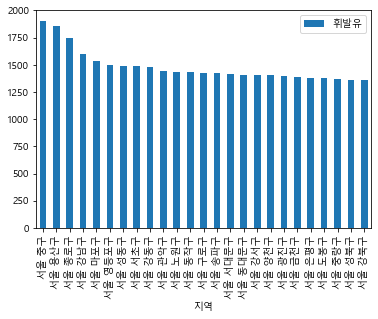

<Figure size 720x360 with 0 Axes>

In [7]:
seoul.pivot_table('휘발유',index=['지역'],aggfunc='mean').sort_values('휘발유',ascending=False).plot(kind='bar')
plt.figure(figsize=(10,5))
plt.show()

In [8]:
# 기간별 가격 ex) 기간별 전체 주유소의 가격
seoul.pivot_table('휘발유',index=['기간'],aggfunc='mean')

,휘발유
기간,
2020년 01월,1645.069016
2020년 02월,1621.318790
2020년 03월,1555.867149
2020년 04월,1416.519840
2020년 05월,1349.253273
2020년 06월,1417.995248
2020년 07월,1453.244929
2020년 08월,1456.751700
2020년 09월,1445.365598


<AxesSubplot:>

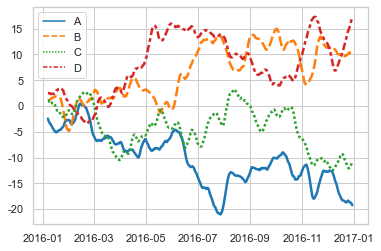

In [9]:
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

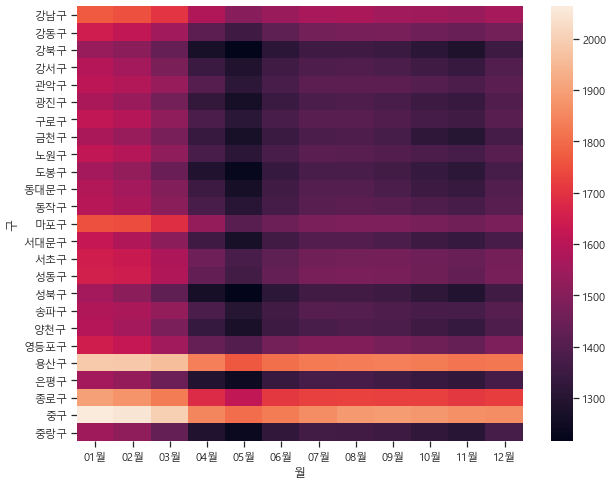

In [15]:
# 기간별+지역 ex)  기간별 다른 지역의 동일한 상호 가격, 기간별 같은 지역의 다른 상호 가격
#round_value = seoul['휘발유'].round(0).astype(int)
#round_value
seoul['시'] = seoul['지역'].str.split(" ").str[0]
seoul['구'] = seoul['지역'].str.split(" ").str[1]
seoul['월'] = seoul['기간'].str.split(" ").str[1]
seoul_loc = seoul.pivot_table(values='휘발유',index=['구'],columns=['월'],aggfunc='mean')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10,8))
sns.heatmap(seoul_loc)
plt.show()

ValueError: Could not interpret value `기간` for parameter `x`

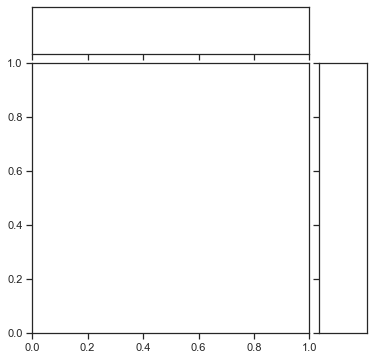

In [18]:
sns.set_theme(style="ticks")

sns.jointplot(x='기간', y='지역', kind="hex", color="#4CB391")

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)


ConversionError: Failed to convert value(s) to axis units: 1       강남구 
2       강남구 
3       강남구 
4       강남구 
5       강남구 
6       강남구 
7       강남구 
8       강남구 
9       강남구 
10      강남구 
11      강남구 
12      강남구 
13      강남구 
14      강남구 
15      강남구 
16      강남구 
17      강남구 
18      강남구 
19      강남구 
20      강남구 
21      강남구 
22      강남구 
23      강남구 
24      강남구 
25      강남구 
26      강남구 
27      강남구 
28      강남구 
29      강남구 
30      강남구 
31      강남구 
32      강남구 
33      강남구 
34      강남구 
35      강남구 
36      강남구 
37      강남구 
38      강남구 
39      강남구 
40      강남구 
41      강남구 
42      강남구 
43      강남구 
44      강남구 
45      강남구 
46      강남구 
47      강남구 
48      강남구 
49      강남구 
50      강남구 
51      강남구 
52      강남구 
53      강남구 
54      강남구 
55      강남구 
56      강남구 
57      강남구 
58      강남구 
59      강남구 
60      강남구 
61      강남구 
62      강남구 
63      강남구 
64      강남구 
65      강남구 
66      강남구 
67      강남구 
68      강남구 
69      강남구 
70      강남구 
71      강남구 
72      강남구 
73      강남구 
74      강남구 
75      강남구 
76      강남구 
77      강남구 
78      강남구 
79      강남구 
80      강남구 
81      강남구 
82      강남구 
83      강남구 
84      강남구 
85      강남구 
86      강남구 
87      강남구 
88      강남구 
89      강남구 
90      강남구 
91      강남구 
92      강남구 
93      강남구 
94      강남구 
95      강남구 
96      강남구 
97      강남구 
98      강남구 
99      강남구 
100     강남구 
101     강남구 
102     강남구 
103     강남구 
104     강남구 
105     강남구 
106     강남구 
107     강남구 
108     강남구 
109     강남구 
110     강남구 
111     강남구 
112     강남구 
113     강남구 
114     강남구 
115     강남구 
116     강남구 
117     강남구 
118     강남구 
119     강남구 
120     강남구 
121     강남구 
122     강남구 
123     강남구 
124     강남구 
125     강남구 
126     강남구 
127     강남구 
128     강남구 
129     강남구 
130     강남구 
131     강남구 
132     강남구 
133     강남구 
134     강남구 
135     강남구 
136     강남구 
137     강남구 
138     강남구 
139     강남구 
140     강남구 
141     강남구 
142     강남구 
143     강남구 
144     강남구 
145     강남구 
146     강남구 
147     강남구 
148     강남구 
149     강남구 
150     강남구 
151     강남구 
152     강남구 
153     강남구 
154     강남구 
155     강남구 
156     강남구 
157     강남구 
158     강남구 
159     강남구 
160     강남구 
161     강남구 
162     강남구 
163     강남구 
164     강남구 
165     강남구 
166     강남구 
167     강남구 
168     강남구 
169     강남구 
170     강남구 
171     강남구 
172     강남구 
173     강남구 
174     강남구 
175     강남구 
176     강남구 
177     강남구 
178     강남구 
179     강남구 
180     강남구 
181     강남구 
182     강남구 
183     강남구 
184     강남구 
185     강남구 
186     강남구 
187     강남구 
188     강남구 
189     강남구 
190     강남구 
191     강남구 
192     강남구 
193     강남구 
194     강남구 
195     강남구 
196     강남구 
197     강남구 
198     강남구 
199     강남구 
200     강남구 
201     강남구 
202     강남구 
203     강남구 
204     강남구 
205     강남구 
206     강남구 
207     강남구 
208     강남구 
209     강남구 
210     강남구 
211     강남구 
212     강남구 
213     강남구 
214     강남구 
215     강남구 
216     강남구 
217     강남구 
218     강남구 
219     강남구 
220     강남구 
221     강남구 
222     강남구 
223     강남구 
224     강남구 
225     강남구 
226     강남구 
227     강남구 
228     강남구 
229     강남구 
230     강남구 
231     강남구 
232     강남구 
233     강남구 
234     강남구 
235     강남구 
236     강남구 
237     강남구 
238     강남구 
239     강남구 
240     강남구 
241     강동구 
242     강동구 
243     강동구 
244     강동구 
245     강동구 
246     강동구 
247     강동구 
248     강동구 
249     강동구 
250     강동구 
251     강동구 
252     강동구 
253     강동구 
254     강동구 
255     강동구 
256     강동구 
257     강동구 
258     강동구 
259     강동구 
260     강동구 
261     강동구 
262     강동구 
263     강동구 
264     강동구 
265     강동구 
266     강동구 
267     강동구 
268     강동구 
269     강동구 
270     강동구 
271     강동구 
272     강동구 
273     강동구 
274     강동구 
275     강동구 
276     강동구 
277     강동구 
278     강동구 
279     강동구 
280     강동구 
281     강동구 
282     강동구 
283     강동구 
284     강동구 
285     강동구 
286     강동구 
287     강동구 
288     강동구 
289     강동구 
290     강동구 
291     강동구 
292     강동구 
293     강동구 
294     강동구 
295     강동구 
296     강동구 
297     강동구 
298     강동구 
299     강동구 
300     강동구 
301     강동구 
302     강동구 
303     강동구 
304     강동구 
305     강동구 
306     강동구 
307     강동구 
308     강동구 
309     강동구 
310     강동구 
311     강동구 
312     강동구 
313     강동구 
314     강동구 
315     강동구 
316     강동구 
317     강동구 
318     강동구 
319     강동구 
320     강동구 
321     강동구 
322     강동구 
323     강동구 
324     강동구 
325     강동구 
326     강동구 
327     강동구 
328     강동구 
329     강동구 
330     강동구 
331     강동구 
332     강동구 
333     강동구 
334     강동구 
335     강동구 
336     강동구 
337     강북구 
338     강북구 
339     강북구 
340     강북구 
341     강북구 
342     강북구 
343     강북구 
344     강북구 
345     강북구 
346     강북구 
347     강북구 
348     강북구 
349     강북구 
350     강북구 
351     강북구 
352     강북구 
353     강북구 
354     강북구 
355     강북구 
356     강북구 
357     강북구 
358     강북구 
359     강북구 
360     강북구 
361     강북구 
362     강북구 
363     강북구 
364     강북구 
365     강북구 
366     강북구 
367     강북구 
368     강북구 
369     강북구 
370     강북구 
371     강북구 
372     강북구 
373     강북구 
374     강북구 
375     강북구 
376     강북구 
377     강북구 
378     강북구 
379     강북구 
380     강북구 
381     강북구 
382     강북구 
383     강북구 
384     강북구 
385     강북구 
386     강북구 
387     강북구 
388     강북구 
389     강북구 
390     강북구 
391     강북구 
392     강북구 
393     강북구 
394     강북구 
395     강북구 
396     강북구 
397     강북구 
398     강북구 
399     강북구 
400     강북구 
401     강북구 
402     강북구 
403     강북구 
404     강북구 
405     강북구 
406     강북구 
407     강북구 
408     강북구 
409     강북구 
410     강북구 
411     강북구 
412     강북구 
413     강북구 
414     강북구 
415     강서구 
416     강서구 
417     강서구 
418     강서구 
419     강서구 
420     강서구 
421     강서구 
422     강서구 
423     강서구 
424     강서구 
425     강서구 
426     강서구 
427     강서구 
428     강서구 
429     강서구 
430     강서구 
431     강서구 
432     강서구 
433     강서구 
434     강서구 
435     강서구 
436     강서구 
437     강서구 
438     강서구 
439     강서구 
440     강서구 
441     강서구 
442     강서구 
443     강서구 
444     강서구 
445     강서구 
446     강서구 
447     강서구 
448     강서구 
449     강서구 
450     강서구 
451     강서구 
452     강서구 
453     강서구 
454     강서구 
455     강서구 
456     강서구 
457     강서구 
458     강서구 
459     강서구 
460     강서구 
461     강서구 
462     강서구 
463     강서구 
464     강서구 
465     강서구 
466     강서구 
467     강서구 
468     강서구 
469     강서구 
470     강서구 
471     강서구 
472     강서구 
473     강서구 
474     강서구 
475     강서구 
476     강서구 
477     강서구 
478     강서구 
479     강서구 
480     강서구 
481     강서구 
482     강서구 
483     강서구 
484     강서구 
485     강서구 
486     강서구 
487     강서구 
488     강서구 
489     강서구 
490     강서구 
491     강서구 
492     강서구 
493     강서구 
494     강서구 
495     강서구 
496     강서구 
497     강서구 
498     강서구 
499     강서구 
500     강서구 
501     강서구 
502     강서구 
503     강서구 
504     강서구 
505     강서구 
506     강서구 
507     강서구 
508     강서구 
509     강서구 
510     강서구 
511     강서구 
512     강서구 
513     강서구 
514     강서구 
515     강서구 
516     강서구 
517     강서구 
518     강서구 
519     강서구 
520     강서구 
521     강서구 
522     강서구 
523     강서구 
524     강서구 
525     강서구 
526     강서구 
527     강서구 
528     강서구 
529     강서구 
530     강서구 
531     강서구 
532     강서구 
533     강서구 
534     강서구 
535     강서구 
536     강서구 
537     강서구 
538     강서구 
539     강서구 
540     강서구 
541     강서구 
542     강서구 
543     강서구 
544     강서구 
545     강서구 
546     강서구 
547     강서구 
548     강서구 
549     강서구 
550     강서구 
551     강서구 
552     강서구 
553     강서구 
554     강서구 
555     강서구 
556     강서구 
557     강서구 
558     강서구 
559     강서구 
560     강서구 
561     강서구 
562     강서구 
563     강서구 
564     강서구 
565     강서구 
566     강서구 
567     강서구 
568     강서구 
569     강서구 
570     강서구 
571     강서구 
572     강서구 
573     강서구 
574     강서구 
575     강서구 
576     강서구 
577     강서구 
578     강서구 
579     강서구 
580     강서구 
581     강서구 
582     강서구 
583     강서구 
584     강서구 
585     강서구 
586     강서구 
587     강서구 
588     강서구 
589     강서구 
590     강서구 
591     강서구 
592     강서구 
593     강서구 
594     강서구 
595     강서구 
596     강서구 
597     강서구 
598     강서구 
599     강서구 
600     강서구 
601     강서구 
602     강서구 
603     강서구 
604     강서구 
605     강서구 
606     강서구 
607     강서구 
608     강서구 
609     강서구 
610     강서구 
611     강서구 
612     강서구 
613     강서구 
614     강서구 
615     강서구 
616     강서구 
617     강서구 
618     강서구 
619     관악구 
620     관악구 
621     관악구 
622     관악구 
623     관악구 
624     관악구 
625     관악구 
626     관악구 
627     관악구 
628     관악구 
629     관악구 
630     관악구 
631     관악구 
632     관악구 
633     관악구 
634     관악구 
635     관악구 
636     관악구 
637     관악구 
638     관악구 
639     관악구 
640     관악구 
641     관악구 
642     관악구 
643     관악구 
644     관악구 
645     관악구 
646     관악구 
647     관악구 
648     관악구 
649     관악구 
650     관악구 
651     관악구 
652     관악구 
653     관악구 
654     관악구 
655     관악구 
656     관악구 
657     관악구 
658     관악구 
659     관악구 
660     관악구 
661     관악구 
662     관악구 
663     관악구 
664     관악구 
665     관악구 
666     관악구 
667     관악구 
668     관악구 
669     관악구 
670     관악구 
671     관악구 
672     관악구 
673     관악구 
674     관악구 
675     관악구 
676     관악구 
677     관악구 
678     관악구 
679     관악구 
680     관악구 
681     관악구 
682     관악구 
683     관악구 
684     관악구 
685     관악구 
686     관악구 
687     관악구 
688     관악구 
689     관악구 
690     관악구 
691     관악구 
692     관악구 
693     관악구 
694     관악구 
695     관악구 
696     관악구 
697     관악구 
698     관악구 
699     관악구 
700     관악구 
701     관악구 
702     관악구 
703     관악구 
704     관악구 
705     관악구 
706     관악구 
707     관악구 
708     관악구 
709     관악구 
710     관악구 
711     관악구 
712     관악구 
713     관악구 
714     관악구 
715     광진구 
716     광진구 
717     광진구 
718     광진구 
719     광진구 
720     광진구 
721     광진구 
722     광진구 
723     광진구 
724     광진구 
725     광진구 
726     광진구 
727     광진구 
728     광진구 
729     광진구 
730     광진구 
731     광진구 
732     광진구 
733     광진구 
734     광진구 
735     광진구 
736     광진구 
737     광진구 
738     광진구 
739     광진구 
740     광진구 
741     광진구 
742     광진구 
743     광진구 
744     광진구 
745     광진구 
746     광진구 
747     광진구 
748     광진구 
749     광진구 
750     광진구 
751     광진구 
752     광진구 
753     광진구 
754     광진구 
755     광진구 
756     광진구 
757     광진구 
758     광진구 
759     광진구 
760     광진구 
761     광진구 
762     광진구 
763     광진구 
764     광진구 
765     광진구 
766     광진구 
767     광진구 
768     광진구 
769     광진구 
770     광진구 
771     광진구 
772     광진구 
773     광진구 
774     광진구 
775     광진구 
776     광진구 
777     광진구 
778     광진구 
779     광진구 
780     광진구 
781     광진구 
782     광진구 
783     광진구 
784     광진구 
785     광진구 
786     광진구 
787     광진구 
788     광진구 
789     광진구 
790     광진구 
791     광진구 
792     광진구 
793     광진구 
794     광진구 
795     광진구 
796     광진구 
797     광진구 
798     광진구 
799     광진구 
800     광진구 
801     광진구 
802     광진구 
803     광진구 
804     광진구 
805     광진구 
806     광진구 
807     광진구 
808     광진구 
809     광진구 
810     광진구 
811     광진구 
812     광진구 
813     광진구 
814     광진구 
815     광진구 
816     광진구 
817     구로구 
818     구로구 
819     구로구 
820     구로구 
821     구로구 
822     구로구 
823     구로구 
824     구로구 
825     구로구 
826     구로구 
827     구로구 
828     구로구 
829     구로구 
830     구로구 
831     구로구 
832     구로구 
833     구로구 
834     구로구 
835     구로구 
836     구로구 
837     구로구 
838     구로구 
839     구로구 
840     구로구 
841     구로구 
842     구로구 
843     구로구 
844     구로구 
845     구로구 
846     구로구 
847     구로구 
848     구로구 
849     구로구 
850     구로구 
851     구로구 
852     구로구 
853     구로구 
854     구로구 
855     구로구 
856     구로구 
857     구로구 
858     구로구 
859     구로구 
860     구로구 
861     구로구 
862     구로구 
863     구로구 
864     구로구 
865     구로구 
866     구로구 
867     구로구 
868     구로구 
869     구로구 
870     구로구 
871     구로구 
872     구로구 
873     구로구 
874     구로구 
875     구로구 
876     구로구 
877     구로구 
878     구로구 
879     구로구 
880     구로구 
881     구로구 
882     구로구 
883     구로구 
884     구로구 
885     구로구 
886     구로구 
887     구로구 
888     구로구 
889     구로구 
890     구로구 
891     구로구 
892     구로구 
893     구로구 
894     구로구 
895     구로구 
896     구로구 
897     구로구 
898     구로구 
899     구로구 
900     구로구 
901     구로구 
902     구로구 
903     구로구 
904     구로구 
905     구로구 
906     구로구 
907     구로구 
908     구로구 
909     구로구 
910     구로구 
911     구로구 
912     구로구 
913     구로구 
914     구로구 
915     구로구 
916     구로구 
917     구로구 
918     구로구 
919     구로구 
920     구로구 
921     구로구 
922     구로구 
923     구로구 
924     구로구 
925     구로구 
926     구로구 
927     구로구 
928     구로구 
929     구로구 
930     구로구 
931     구로구 
932     구로구 
933     구로구 
934     구로구 
935     구로구 
936     구로구 
937     구로구 
938     구로구 
939     구로구 
940     구로구 
941     구로구 
942     구로구 
943     구로구 
944     구로구 
945     구로구 
946     구로구 
947     금천구 
948     금천구 
949     금천구 
950     금천구 
951     금천구 
952     금천구 
953     금천구 
954     금천구 
955     금천구 
956     금천구 
957     금천구 
958     금천구 
959     금천구 
960     금천구 
961     금천구 
962     금천구 
963     금천구 
964     금천구 
965     금천구 
966     금천구 
967     금천구 
968     금천구 
969     금천구 
970     금천구 
971     금천구 
972     금천구 
973     금천구 
974     금천구 
975     금천구 
976     금천구 
977     금천구 
978     금천구 
979     금천구 
980     금천구 
981     금천구 
982     금천구 
983     금천구 
984     금천구 
985     금천구 
986     금천구 
987     금천구 
988     금천구 
989     금천구 
990     금천구 
991     금천구 
992     금천구 
993     금천구 
994     금천구 
995     금천구 
996     금천구 
997     금천구 
998     금천구 
999     금천구 
1000    금천구 
1001    금천구 
1002    금천구 
1003    금천구 
1004    금천구 
1005    금천구 
1006    금천구 
1007    금천구 
1008    금천구 
1009    금천구 
1010    금천구 
1011    금천구 
1012    금천구 
1013    금천구 
1014    금천구 
1015    금천구 
1016    금천구 
1017    금천구 
1018    금천구 
1019    금천구 
1020    금천구 
1021    금천구 
1022    금천구 
1023    금천구 
1024    금천구 
1025    노원구 
1026    노원구 
1027    노원구 
1028    노원구 
1029    노원구 
1030    노원구 
1031    노원구 
1032    노원구 
1033    노원구 
1034    노원구 
1035    노원구 
1036    노원구 
1037    노원구 
1038    노원구 
1039    노원구 
1040    노원구 
1041    노원구 
1042    노원구 
1043    노원구 
1044    노원구 
1045    노원구 
1046    노원구 
1047    노원구 
1048    노원구 
1049    노원구 
1050    노원구 
1051    노원구 
1052    노원구 
1053    노원구 
1054    노원구 
1055    노원구 
1056    노원구 
1057    노원구 
1058    노원구 
1059    노원구 
1060    노원구 
1061    노원구 
1062    노원구 
1063    노원구 
1064    노원구 
1065    노원구 
1066    노원구 
1067    노원구 
1068    노원구 
1069    노원구 
1070    노원구 
1071    노원구 
1072    노원구 
1073    노원구 
1074    노원구 
1075    노원구 
1076    노원구 
1077    노원구 
1078    노원구 
1079    노원구 
1080    노원구 
1081    노원구 
1082    노원구 
1083    노원구 
1084    노원구 
1085    노원구 
1086    노원구 
1087    노원구 
1088    노원구 
1089    노원구 
1090    노원구 
1091    노원구 
1092    노원구 
1093    노원구 
1094    노원구 
1095    노원구 
1096    노원구 
1097    노원구 
1098    노원구 
1099    노원구 
1100    노원구 
1101    노원구 
1102    노원구 
1103    노원구 
1104    노원구 
1105    노원구 
1106    노원구 
1107    노원구 
1108    노원구 
1109    노원구 
1110    노원구 
1111    노원구 
1112    노원구 
1113    노원구 
1114    노원구 
1115    도봉구 
1116    도봉구 
1117    도봉구 
1118    도봉구 
1119    도봉구 
1120    도봉구 
1121    도봉구 
1122    도봉구 
1123    도봉구 
1124    도봉구 
1125    도봉구 
1126    도봉구 
1127    도봉구 
1128    도봉구 
1129    도봉구 
1130    도봉구 
1131    도봉구 
1132    도봉구 
1133    도봉구 
1134    도봉구 
1135    도봉구 
1136    도봉구 
1137    도봉구 
1138    도봉구 
1139    도봉구 
1140    도봉구 
1141    도봉구 
1142    도봉구 
1143    도봉구 
1144    도봉구 
1145    도봉구 
1146    도봉구 
1147    도봉구 
1148    도봉구 
1149    도봉구 
1150    도봉구 
1151    도봉구 
1152    도봉구 
1153    도봉구 
1154    도봉구 
1155    도봉구 
1156    도봉구 
1157    도봉구 
1158    도봉구 
1159    도봉구 
1160    도봉구 
1161    도봉구 
1162    도봉구 
1163    도봉구 
1164    도봉구 
1165    도봉구 
1166    도봉구 
1167    도봉구 
1168    도봉구 
1169    도봉구 
1170    도봉구 
1171    도봉구 
1172    도봉구 
1173    도봉구 
1174    도봉구 
1175    도봉구 
1176    도봉구 
1177    도봉구 
1178    도봉구 
1179    도봉구 
1180    도봉구 
1181    도봉구 
1182    도봉구 
1183    도봉구 
1184    도봉구 
1185    도봉구 
1186    도봉구 
1187    도봉구 
1188    도봉구 
1189    도봉구 
1190    도봉구 
1191    도봉구 
1192    도봉구 
1193    도봉구 
1194    도봉구 
1195    도봉구 
1196    도봉구 
1197    도봉구 
1198    도봉구 
1199    도봉구 
1200    도봉구 
1201    도봉구 
1202    도봉구 
1203    도봉구 
1204    도봉구 
1205    도봉구 
1206    도봉구 
1207    도봉구 
1208    도봉구 
1209    도봉구 
1210    도봉구 
1211    도봉구 
1212    도봉구 
1213    도봉구 
1214    도봉구 
1215    도봉구 
1216    도봉구 
1217    도봉구 
1218    도봉구 
1219    도봉구 
1220    도봉구 
1221    도봉구 
1222    도봉구 
1223    동대문구
1224    동대문구
1225    동대문구
1226    동대문구
1227    동대문구
1228    동대문구
1229    동대문구
1230    동대문구
1231    동대문구
1232    동대문구
1233    동대문구
1234    동대문구
1235    동대문구
1236    동대문구
1237    동대문구
1238    동대문구
1239    동대문구
1240    동대문구
1241    동대문구
1242    동대문구
1243    동대문구
1244    동대문구
1245    동대문구
1246    동대문구
1247    동대문구
1248    동대문구
1249    동대문구
1250    동대문구
1251    동대문구
1252    동대문구
1253    동대문구
1254    동대문구
1255    동대문구
1256    동대문구
1257    동대문구
1258    동대문구
1259    동대문구
1260    동대문구
1261    동대문구
1262    동대문구
1263    동대문구
1264    동대문구
1265    동대문구
1266    동대문구
1267    동대문구
1268    동대문구
1269    동대문구
1270    동대문구
1271    동대문구
1272    동대문구
1273    동대문구
1274    동대문구
1275    동대문구
1276    동대문구
1277    동대문구
1278    동대문구
1279    동대문구
1280    동대문구
1281    동대문구
1282    동대문구
1283    동대문구
1284    동대문구
1285    동대문구
1286    동대문구
1287    동대문구
1288    동대문구
1289    동대문구
1290    동대문구
1291    동대문구
1292    동대문구
1293    동대문구
1294    동대문구
1295    동대문구
1296    동대문구
1297    동대문구
1298    동대문구
1299    동대문구
1300    동대문구
1301    동대문구
1302    동대문구
1303    동대문구
1304    동대문구
1305    동대문구
1306    동대문구
1307    동대문구
1308    동대문구
1309    동대문구
1310    동대문구
1311    동대문구
1312    동대문구
1313    동대문구
1314    동대문구
1315    동대문구
1316    동대문구
1317    동대문구
1318    동대문구
1319    동대문구
1320    동대문구
1321    동대문구
1322    동대문구
1323    동대문구
1324    동대문구
1325    동대문구
1326    동대문구
1327    동대문구
1328    동대문구
1329    동대문구
1330    동대문구
1331    동대문구
1332    동대문구
1333    동대문구
1334    동대문구
1335    동대문구
1336    동대문구
1337    동대문구
1338    동대문구
1339    동대문구
1340    동대문구
1341    동대문구
1342    동대문구
1343    동대문구
1344    동대문구
1345    동대문구
1346    동대문구
1347    동대문구
1348    동대문구
1349    동대문구
1350    동대문구
1351    동대문구
1352    동대문구
1353    동대문구
1354    동대문구
1355    동대문구
1356    동작구 
1357    동작구 
1358    동작구 
1359    동작구 
1360    동작구 
1361    동작구 
1362    동작구 
1363    동작구 
1364    동작구 
1365    동작구 
1366    동작구 
1367    동작구 
1368    동작구 
1369    동작구 
1370    동작구 
1371    동작구 
1372    동작구 
1373    동작구 
1374    동작구 
1375    동작구 
1376    동작구 
1377    동작구 
1378    동작구 
1379    동작구 
1380    동작구 
1381    동작구 
1382    동작구 
1383    동작구 
1384    동작구 
1385    동작구 
1386    동작구 
1387    동작구 
1388    동작구 
1389    동작구 
1390    동작구 
1391    동작구 
1392    동작구 
1393    동작구 
1394    동작구 
1395    동작구 
1396    동작구 
1397    동작구 
1398    동작구 
1399    동작구 
1400    동작구 
1401    동작구 
1402    동작구 
1403    동작구 
1404    동작구 
1405    동작구 
1406    동작구 
1407    동작구 
1408    동작구 
1409    동작구 
1410    동작구 
1411    동작구 
1412    동작구 
1413    동작구 
1414    동작구 
1415    동작구 
1416    마포구 
1417    마포구 
1418    마포구 
1419    마포구 
1420    마포구 
1421    마포구 
1422    마포구 
1423    마포구 
1424    마포구 
1425    마포구 
1426    마포구 
1427    마포구 
1428    마포구 
1429    마포구 
1430    마포구 
1431    마포구 
1432    마포구 
1433    마포구 
1434    마포구 
1435    마포구 
1436    마포구 
1437    마포구 
1438    마포구 
1439    마포구 
1440    마포구 
1441    마포구 
1442    마포구 
1443    마포구 
1444    마포구 
1445    마포구 
1446    마포구 
1447    마포구 
1448    마포구 
1449    마포구 
1450    마포구 
1451    마포구 
1452    마포구 
1453    마포구 
1454    마포구 
1455    마포구 
1456    마포구 
1457    마포구 
1458    마포구 
1459    마포구 
1460    마포구 
1461    마포구 
1462    마포구 
1463    마포구 
1464    마포구 
1465    마포구 
1466    마포구 
1467    마포구 
1468    마포구 
1469    마포구 
1470    마포구 
1471    마포구 
1472    마포구 
1473    마포구 
1474    마포구 
1475    마포구 
1476    마포구 
1477    마포구 
1478    마포구 
1479    마포구 
1480    마포구 
1481    마포구 
1482    마포구 
1483    마포구 
1484    마포구 
1485    마포구 
1486    서대문구
1487    서대문구
1488    서대문구
1489    서대문구
1490    서대문구
1491    서대문구
1492    서대문구
1493    서대문구
1494    서대문구
1495    서대문구
1496    서대문구
1497    서대문구
1498    서대문구
1499    서대문구
1500    서대문구
1501    서대문구
1502    서대문구
1503    서대문구
1504    서대문구
1505    서대문구
1506    서대문구
1507    서대문구
1508    서대문구
1509    서대문구
1510    서대문구
1511    서대문구
1512    서대문구
1513    서대문구
1514    서대문구
1515    서대문구
1516    서대문구
1517    서대문구
1518    서대문구
1519    서대문구
1520    서대문구
1521    서대문구
1522    서대문구
1523    서대문구
1524    서대문구
1525    서대문구
1526    서대문구
1527    서대문구
1528    서대문구
1529    서대문구
1530    서대문구
1531    서대문구
1532    서대문구
1533    서대문구
1534    서대문구
1535    서대문구
1536    서대문구
1537    서대문구
1538    서대문구
1539    서대문구
1540    서대문구
1541    서대문구
1542    서대문구
1543    서대문구
1544    서대문구
1545    서대문구
1546    서대문구
1547    서대문구
1548    서대문구
1549    서대문구
1550    서대문구
1551    서대문구
1552    서대문구
1553    서대문구
1554    서대문구
1555    서대문구
1556    서대문구
1557    서대문구
1558    서대문구
1559    서대문구
1560    서대문구
1561    서대문구
1562    서대문구
1563    서대문구
1564    서대문구
1565    서대문구
1566    서대문구
1567    서대문구
1568    서대문구
1569    서대문구
1570    서대문구
1571    서대문구
1572    서대문구
1573    서대문구
1574    서대문구
1575    서대문구
1576    서초구 
1577    서초구 
1578    서초구 
1579    서초구 
1580    서초구 
1581    서초구 
1582    서초구 
1583    서초구 
1584    서초구 
1585    서초구 
1586    서초구 
1587    서초구 
1588    서초구 
1589    서초구 
1590    서초구 
1591    서초구 
1592    서초구 
1593    서초구 
1594    서초구 
1595    서초구 
1596    서초구 
1597    서초구 
1598    서초구 
1599    서초구 
1600    서초구 
1601    서초구 
1602    서초구 
1603    서초구 
1604    서초구 
1605    서초구 
1606    서초구 
1607    서초구 
1608    서초구 
1609    서초구 
1610    서초구 
1611    서초구 
1612    서초구 
1613    서초구 
1614    서초구 
1615    서초구 
1616    서초구 
1617    서초구 
1618    서초구 
1619    서초구 
1620    서초구 
1621    서초구 
1622    서초구 
1623    서초구 
1624    서초구 
1625    서초구 
1626    서초구 
1627    서초구 
1628    서초구 
1629    서초구 
1630    서초구 
1631    서초구 
1632    서초구 
1633    서초구 
1634    서초구 
1635    서초구 
1636    서초구 
1637    서초구 
1638    서초구 
1639    서초구 
1640    서초구 
1641    서초구 
1642    서초구 
1643    서초구 
1644    서초구 
1645    서초구 
1646    서초구 
1647    서초구 
1648    서초구 
1649    서초구 
1650    서초구 
1651    서초구 
1652    서초구 
1653    서초구 
1654    서초구 
1655    서초구 
1656    서초구 
1657    서초구 
1658    서초구 
1659    서초구 
1660    서초구 
1661    서초구 
1662    서초구 
1663    서초구 
1664    서초구 
1665    서초구 
1666    서초구 
1667    서초구 
1668    서초구 
1669    서초구 
1670    서초구 
1671    서초구 
1672    서초구 
1673    서초구 
1674    서초구 
1675    서초구 
1676    서초구 
1677    서초구 
1678    서초구 
1679    서초구 
1680    서초구 
1681    서초구 
1682    서초구 
1683    서초구 
1684    서초구 
1685    서초구 
1686    서초구 
1687    서초구 
1688    서초구 
1689    서초구 
1690    서초구 
1691    서초구 
1692    서초구 
1693    서초구 
1694    서초구 
1695    서초구 
1696    서초구 
1697    서초구 
1698    서초구 
1699    서초구 
1700    서초구 
1701    서초구 
1702    서초구 
1703    서초구 
1704    서초구 
1705    서초구 
1706    서초구 
1707    서초구 
1708    서초구 
1709    서초구 
1710    서초구 
1711    서초구 
1712    서초구 
1713    서초구 
1714    서초구 
1715    서초구 
1716    서초구 
1717    서초구 
1718    서초구 
1719    서초구 
1720    서초구 
1721    서초구 
1722    서초구 
1723    서초구 
1724    서초구 
1725    서초구 
1726    서초구 
1727    서초구 
1728    서초구 
1729    서초구 
1730    서초구 
1731    서초구 
1732    서초구 
1733    서초구 
1734    서초구 
1735    서초구 
1736    서초구 
1737    서초구 
1738    서초구 
1739    서초구 
1740    서초구 
1741    서초구 
1742    서초구 
1743    서초구 
1744    서초구 
1745    서초구 
1746    서초구 
1747    서초구 
1748    서초구 
1749    서초구 
1750    서초구 
1751    서초구 
1752    서초구 
1753    서초구 
1754    서초구 
1755    서초구 
1756    서초구 
1757    서초구 
1758    서초구 
1759    서초구 
1760    서초구 
1761    서초구 
1762    서초구 
1763    서초구 
1764    서초구 
1765    서초구 
1766    서초구 
1767    서초구 
1768    서초구 
1769    서초구 
1770    서초구 
1771    서초구 
1772    서초구 
1773    서초구 
1774    서초구 
1775    서초구 
1776    서초구 
1777    서초구 
1778    서초구 
1779    서초구 
1780    서초구 
1781    서초구 
1782    서초구 
1783    서초구 
1784    서초구 
1785    서초구 
1786    서초구 
1787    서초구 
1788    서초구 
1789    서초구 
1790    서초구 
1791    서초구 
1792    서초구 
1793    성동구 
1794    성동구 
1795    성동구 
1796    성동구 
1797    성동구 
1798    성동구 
1799    성동구 
1800    성동구 
1801    성동구 
1802    성동구 
1803    성동구 
1804    성동구 
1805    성동구 
1806    성동구 
1807    성동구 
1808    성동구 
1809    성동구 
1810    성동구 
1811    성동구 
1812    성동구 
1813    성동구 
1814    성동구 
1815    성동구 
1816    성동구 
1817    성동구 
1818    성동구 
1819    성동구 
1820    성동구 
1821    성동구 
1822    성동구 
1823    성동구 
1824    성동구 
1825    성동구 
1826    성동구 
1827    성동구 
1828    성동구 
1829    성동구 
1830    성동구 
1831    성동구 
1832    성동구 
1833    성동구 
1834    성동구 
1835    성동구 
1836    성동구 
1837    성동구 
1838    성동구 
1839    성동구 
1840    성동구 
1841    성동구 
1842    성동구 
1843    성동구 
1844    성동구 
1845    성동구 
1846    성동구 
1847    성동구 
1848    성동구 
1849    성동구 
1850    성동구 
1851    성동구 
1852    성동구 
1853    성동구 
1854    성동구 
1855    성동구 
1856    성동구 
1857    성동구 
1858    성동구 
1859    성동구 
1860    성동구 
1861    성동구 
1862    성동구 
1863    성동구 
1864    성동구 
1865    성동구 
1866    성동구 
1867    성동구 
1868    성동구 
1869    성동구 
1870    성동구 
1871    성동구 
1872    성동구 
1873    성동구 
1874    성동구 
1875    성동구 
1876    성동구 
1877    성동구 
1878    성동구 
1879    성동구 
1880    성동구 
1881    성동구 
1882    성동구 
1883    성동구 
1884    성동구 
1885    성동구 
1886    성동구 
1887    성동구 
1888    성동구 
1889    성동구 
1890    성동구 
1891    성동구 
1892    성동구 
1893    성동구 
1894    성북구 
1895    성북구 
1896    성북구 
1897    성북구 
1898    성북구 
1899    성북구 
1900    성북구 
1901    성북구 
1902    성북구 
1903    성북구 
1904    성북구 
1905    성북구 
1906    성북구 
1907    성북구 
1908    성북구 
1909    성북구 
1910    성북구 
1911    성북구 
1912    성북구 
1913    성북구 
1914    성북구 
1915    성북구 
1916    성북구 
1917    성북구 
1918    성북구 
1919    성북구 
1920    성북구 
1921    성북구 
1922    성북구 
1923    성북구 
1924    성북구 
1925    성북구 
1926    성북구 
1927    성북구 
1928    성북구 
1929    성북구 
1930    성북구 
1931    성북구 
1932    성북구 
1933    성북구 
1934    성북구 
1935    성북구 
1936    성북구 
1937    성북구 
1938    성북구 
1939    성북구 
1940    성북구 
1941    성북구 
1942    성북구 
1943    성북구 
1944    성북구 
1945    성북구 
1946    성북구 
1947    성북구 
1948    성북구 
1949    성북구 
1950    성북구 
1951    성북구 
1952    성북구 
1953    성북구 
1954    성북구 
1955    성북구 
1956    성북구 
1957    성북구 
1958    성북구 
1959    성북구 
1960    성북구 
1961    성북구 
1962    성북구 
1963    성북구 
1964    성북구 
1965    성북구 
1966    성북구 
1967    성북구 
1968    성북구 
1969    성북구 
1970    성북구 
1971    성북구 
1972    성북구 
1973    성북구 
1974    성북구 
1975    성북구 
1976    성북구 
1977    성북구 
1978    성북구 
1979    성북구 
1980    성북구 
1981    성북구 
1982    성북구 
1983    성북구 
1984    성북구 
1985    성북구 
1986    성북구 
1987    성북구 
1988    성북구 
1989    성북구 
1990    성북구 
1991    성북구 
1992    성북구 
1993    성북구 
1994    성북구 
1995    성북구 
1996    성북구 
1997    성북구 
1998    성북구 
1999    성북구 
2000    성북구 
2001    성북구 
2002    성북구 
2003    성북구 
2004    성북구 
2005    성북구 
2006    성북구 
2007    성북구 
2008    성북구 
2009    성북구 
2010    성북구 
2011    성북구 
2012    성북구 
2013    성북구 
2014    성북구 
2015    성북구 
2016    성북구 
2017    성북구 
2018    성북구 
2019    성북구 
2020    성북구 
2021    성북구 
2022    성북구 
2023    성북구 
2024    성북구 
2025    성북구 
2026    성북구 
2027    성북구 
2028    성북구 
2029    성북구 
2030    성북구 
2031    성북구 
2032    성북구 
2033    성북구 
2034    성북구 
2035    성북구 
2036    성북구 
2037    성북구 
2038    성북구 
2039    송파구 
2040    송파구 
2041    송파구 
2042    송파구 
2043    송파구 
2044    송파구 
2045    송파구 
2046    송파구 
2047    송파구 
2048    송파구 
2049    송파구 
2050    송파구 
2051    송파구 
2052    송파구 
2053    송파구 
2054    송파구 
2055    송파구 
2056    송파구 
2057    송파구 
2058    송파구 
2059    송파구 
2060    송파구 
2061    송파구 
2062    송파구 
2063    송파구 
2064    송파구 
2065    송파구 
2066    송파구 
2067    송파구 
2068    송파구 
2069    송파구 
2070    송파구 
2071    송파구 
2072    송파구 
2073    송파구 
2074    송파구 
2075    송파구 
2076    송파구 
2077    송파구 
2078    송파구 
2079    송파구 
2080    송파구 
2081    송파구 
2082    송파구 
2083    송파구 
2084    송파구 
2085    송파구 
2086    송파구 
2087    송파구 
2088    송파구 
2089    송파구 
2090    송파구 
2091    송파구 
2092    송파구 
2093    송파구 
2094    송파구 
2095    송파구 
2096    송파구 
2097    송파구 
2098    송파구 
2099    송파구 
2100    송파구 
2101    송파구 
2102    송파구 
2103    송파구 
2104    송파구 
2105    송파구 
2106    송파구 
2107    송파구 
2108    송파구 
2109    송파구 
2110    송파구 
2111    송파구 
2112    송파구 
2113    송파구 
2114    송파구 
2115    송파구 
2116    송파구 
2117    송파구 
2118    송파구 
2119    송파구 
2120    송파구 
2121    송파구 
2122    송파구 
2123    송파구 
2124    송파구 
2125    송파구 
2126    송파구 
2127    송파구 
2128    송파구 
2129    송파구 
2130    송파구 
2131    송파구 
2132    송파구 
2133    송파구 
2134    송파구 
2135    송파구 
2136    송파구 
2137    송파구 
2138    송파구 
2139    송파구 
2140    송파구 
2141    송파구 
2142    송파구 
2143    송파구 
2144    송파구 
2145    송파구 
2146    송파구 
2147    송파구 
2148    송파구 
2149    송파구 
2150    송파구 
2151    송파구 
2152    송파구 
2153    송파구 
2154    송파구 
2155    송파구 
2156    송파구 
2157    송파구 
2158    송파구 
2159    송파구 
2160    송파구 
2161    송파구 
2162    송파구 
2163    송파구 
2164    송파구 
2165    송파구 
2166    송파구 
2167    송파구 
2168    송파구 
2169    송파구 
2170    송파구 
2171    송파구 
2172    송파구 
2173    송파구 
2174    송파구 
2175    송파구 
2176    송파구 
2177    송파구 
2178    송파구 
2179    송파구 
2180    송파구 
2181    송파구 
2182    송파구 
2183    송파구 
2184    송파구 
2185    송파구 
2186    송파구 
2187    송파구 
2188    송파구 
2189    송파구 
2190    송파구 
2191    송파구 
2192    송파구 
2193    송파구 
2194    송파구 
2195    송파구 
2196    송파구 
2197    송파구 
2198    송파구 
2199    송파구 
2200    송파구 
2201    송파구 
2202    송파구 
2203    송파구 
2204    송파구 
2205    송파구 
2206    송파구 
2207    송파구 
2208    송파구 
2209    송파구 
2210    송파구 
2211    송파구 
2212    송파구 
2213    송파구 
2214    송파구 
2215    송파구 
2216    송파구 
2217    송파구 
2218    송파구 
2219    송파구 
2220    송파구 
2221    송파구 
2222    송파구 
2223    송파구 
2224    송파구 
2225    송파구 
2226    송파구 
2227    송파구 
2228    송파구 
2229    송파구 
2230    송파구 
2231    송파구 
2232    송파구 
2233    송파구 
2234    송파구 
2235    송파구 
2236    송파구 
2237    양천구 
2238    양천구 
2239    양천구 
2240    양천구 
2241    양천구 
2242    양천구 
2243    양천구 
2244    양천구 
2245    양천구 
2246    양천구 
2247    양천구 
2248    양천구 
2249    양천구 
2250    양천구 
2251    양천구 
2252    양천구 
2253    양천구 
2254    양천구 
2255    양천구 
2256    양천구 
2257    양천구 
2258    양천구 
2259    양천구 
2260    양천구 
2261    양천구 
2262    양천구 
2263    양천구 
2264    양천구 
2265    양천구 
2266    양천구 
2267    양천구 
2268    양천구 
2269    양천구 
2270    양천구 
2271    양천구 
2272    양천구 
2273    양천구 
2274    양천구 
2275    양천구 
2276    양천구 
2277    양천구 
2278    양천구 
2279    양천구 
2280    양천구 
2281    양천구 
2282    양천구 
2283    양천구 
2284    양천구 
2285    양천구 
2286    양천구 
2287    양천구 
2288    양천구 
2289    양천구 
2290    양천구 
2291    양천구 
2292    양천구 
2293    양천구 
2294    양천구 
2295    양천구 
2296    양천구 
2297    양천구 
2298    양천구 
2299    양천구 
2300    양천구 
2301    양천구 
2302    양천구 
2303    양천구 
2304    양천구 
2305    양천구 
2306    양천구 
2307    양천구 
2308    양천구 
2309    양천구 
2310    양천구 
2311    양천구 
2312    양천구 
2313    양천구 
2314    양천구 
2315    양천구 
2316    양천구 
2317    양천구 
2318    양천구 
2319    양천구 
2320    양천구 
2321    양천구 
2322    양천구 
2323    양천구 
2324    양천구 
2325    양천구 
2326    양천구 
2327    양천구 
2328    양천구 
2329    양천구 
2330    양천구 
2331    양천구 
2332    양천구 
2333    양천구 
2334    양천구 
2335    양천구 
2336    양천구 
2337    양천구 
2338    양천구 
2339    양천구 
2340    양천구 
2341    양천구 
2342    양천구 
2343    양천구 
2344    양천구 
2345    양천구 
2346    양천구 
2347    양천구 
2348    양천구 
2349    양천구 
2350    양천구 
2351    양천구 
2352    양천구 
2353    양천구 
2354    양천구 
2355    양천구 
2356    양천구 
2357    양천구 
2358    양천구 
2359    양천구 
2360    양천구 
2361    양천구 
2362    양천구 
2363    양천구 
2364    양천구 
2365    양천구 
2366    양천구 
2367    양천구 
2368    양천구 
2369    양천구 
2370    양천구 
2371    양천구 
2372    양천구 
2373    양천구 
2374    양천구 
2375    양천구 
2376    양천구 
2377    양천구 
2378    양천구 
2379    양천구 
2380    양천구 
2381    양천구 
2382    양천구 
2383    양천구 
2384    양천구 
2385    양천구 
2386    양천구 
2387    양천구 
2388    양천구 
2389    양천구 
2390    양천구 
2391    양천구 
2392    양천구 
2393    양천구 
2394    양천구 
2395    양천구 
2396    양천구 
2397    영등포구
2398    영등포구
2399    영등포구
2400    영등포구
2401    영등포구
2402    영등포구
2403    영등포구
2404    영등포구
2405    영등포구
2406    영등포구
2407    영등포구
2408    영등포구
2409    영등포구
2410    영등포구
2411    영등포구
2412    영등포구
2413    영등포구
2414    영등포구
2415    영등포구
2416    영등포구
2417    영등포구
2418    영등포구
2419    영등포구
2420    영등포구
2421    영등포구
2422    영등포구
2423    영등포구
2424    영등포구
2425    영등포구
2426    영등포구
2427    영등포구
2428    영등포구
2429    영등포구
2430    영등포구
2431    영등포구
2432    영등포구
2433    영등포구
2434    영등포구
2435    영등포구
2436    영등포구
2437    영등포구
2438    영등포구
2439    영등포구
2440    영등포구
2441    영등포구
2442    영등포구
2443    영등포구
2444    영등포구
2445    영등포구
2446    영등포구
2447    영등포구
2448    영등포구
2449    영등포구
2450    영등포구
2451    영등포구
2452    영등포구
2453    영등포구
2454    영등포구
2455    영등포구
2456    영등포구
2457    영등포구
2458    영등포구
2459    영등포구
2460    영등포구
2461    영등포구
2462    영등포구
2463    영등포구
2464    영등포구
2465    영등포구
2466    영등포구
2467    영등포구
2468    영등포구
2469    영등포구
2470    영등포구
2471    영등포구
2472    영등포구
2473    영등포구
2474    영등포구
2475    영등포구
2476    영등포구
2477    영등포구
2478    영등포구
2479    영등포구
2480    영등포구
2481    영등포구
2482    영등포구
2483    영등포구
2484    영등포구
2485    영등포구
2486    영등포구
2487    영등포구
2488    영등포구
2489    영등포구
2490    영등포구
2491    영등포구
2492    영등포구
2493    영등포구
2494    영등포구
2495    영등포구
2496    영등포구
2497    영등포구
2498    영등포구
2499    영등포구
2500    영등포구
2501    영등포구
2502    영등포구
2503    영등포구
2504    영등포구
2505    영등포구
2506    영등포구
2507    영등포구
2508    영등포구
2509    영등포구
2510    영등포구
2511    영등포구
2512    영등포구
2513    영등포구
2514    영등포구
2515    영등포구
2516    영등포구
2517    영등포구
2518    영등포구
2519    영등포구
2520    영등포구
2521    영등포구
2522    영등포구
2523    영등포구
2524    영등포구
2525    영등포구
2526    영등포구
2527    영등포구
2528    영등포구
2529    영등포구
2530    영등포구
2531    영등포구
2532    영등포구
2533    영등포구
2534    영등포구
2535    영등포구
2536    영등포구
2537    영등포구
2538    영등포구
2539    영등포구
2540    영등포구
2541    영등포구
2542    영등포구
2543    영등포구
2544    영등포구
2545    영등포구
2546    영등포구
2547    영등포구
2548    영등포구
2549    영등포구
2550    영등포구
2551    영등포구
2552    영등포구
2553    영등포구
2554    영등포구
2555    영등포구
2556    영등포구
2557    영등포구
2558    영등포구
2559    영등포구
2560    영등포구
2561    영등포구
2562    영등포구
2563    영등포구
2564    영등포구
2565    영등포구
2566    영등포구
2567    영등포구
2568    영등포구
2569    영등포구
2570    영등포구
2571    영등포구
2572    영등포구
2573    영등포구
2574    영등포구
2575    영등포구
2576    영등포구
2577    영등포구
2578    영등포구
2579    영등포구
2580    영등포구
2581    영등포구
2582    영등포구
2583    영등포구
2584    영등포구
2585    영등포구
2586    영등포구
2587    영등포구
2588    영등포구
2589    영등포구
2590    용산구 
2591    용산구 
2592    용산구 
2593    용산구 
2594    용산구 
2595    용산구 
2596    용산구 
2597    용산구 
2598    용산구 
2599    용산구 
2600    용산구 
2601    용산구 
2602    용산구 
2603    용산구 
2604    용산구 
2605    용산구 
2606    용산구 
2607    용산구 
2608    용산구 
2609    용산구 
2610    용산구 
2611    용산구 
2612    용산구 
2613    용산구 
2614    용산구 
2615    용산구 
2616    용산구 
2617    용산구 
2618    용산구 
2619    용산구 
2620    용산구 
2621    용산구 
2622    용산구 
2623    용산구 
2624    용산구 
2625    용산구 
2626    용산구 
2627    용산구 
2628    용산구 
2629    용산구 
2630    용산구 
2631    용산구 
2632    용산구 
2633    용산구 
2634    용산구 
2635    용산구 
2636    용산구 
2637    용산구 
2638    용산구 
2639    용산구 
2640    용산구 
2641    용산구 
2642    용산구 
2643    용산구 
2644    용산구 
2645    용산구 
2646    용산구 
2647    용산구 
2648    용산구 
2649    용산구 
2650    용산구 
2651    용산구 
2652    용산구 
2653    용산구 
2654    용산구 
2655    용산구 
2656    용산구 
2657    용산구 
2658    용산구 
2659    용산구 
2660    용산구 
2661    용산구 
2662    용산구 
2663    용산구 
2664    용산구 
2665    용산구 
2666    용산구 
2667    용산구 
2668    용산구 
2669    용산구 
2670    용산구 
2671    용산구 
2672    용산구 
2673    용산구 
2674    은평구 
2675    은평구 
2676    은평구 
2677    은평구 
2678    은평구 
2679    은평구 
2680    은평구 
2681    은평구 
2682    은평구 
2683    은평구 
2684    은평구 
2685    은평구 
2686    은평구 
2687    은평구 
2688    은평구 
2689    은평구 
2690    은평구 
2691    은평구 
2692    은평구 
2693    은평구 
2694    은평구 
2695    은평구 
2696    은평구 
2697    은평구 
2698    은평구 
2699    은평구 
2700    은평구 
2701    은평구 
2702    은평구 
2703    은평구 
2704    은평구 
2705    은평구 
2706    은평구 
2707    은평구 
2708    은평구 
2709    은평구 
2710    은평구 
2711    은평구 
2712    은평구 
2713    은평구 
2714    은평구 
2715    은평구 
2716    은평구 
2717    은평구 
2718    은평구 
2719    은평구 
2720    은평구 
2721    은평구 
2722    은평구 
2723    은평구 
2724    은평구 
2725    은평구 
2726    은평구 
2727    은평구 
2728    은평구 
2729    은평구 
2730    은평구 
2731    은평구 
2732    은평구 
2733    은평구 
2734    은평구 
2735    은평구 
2736    은평구 
2737    은평구 
2738    은평구 
2739    은평구 
2740    은평구 
2741    은평구 
2742    은평구 
2743    은평구 
2744    은평구 
2745    은평구 
2746    은평구 
2747    은평구 
2748    은평구 
2749    은평구 
2750    은평구 
2751    은평구 
2752    은평구 
2753    은평구 
2754    은평구 
2755    은평구 
2756    은평구 
2757    은평구 
2758    은평구 
2759    은평구 
2760    은평구 
2761    은평구 
2762    은평구 
2763    은평구 
2764    은평구 
2765    은평구 
2766    은평구 
2767    은평구 
2768    은평구 
2769    은평구 
2770    은평구 
2771    은평구 
2772    종로구 
2773    종로구 
2774    종로구 
2775    종로구 
2776    종로구 
2777    종로구 
2778    종로구 
2779    종로구 
2780    종로구 
2781    종로구 
2782    종로구 
2783    종로구 
2784    종로구 
2785    종로구 
2786    종로구 
2787    종로구 
2788    종로구 
2789    종로구 
2790    종로구 
2791    종로구 
2792    종로구 
2793    종로구 
2794    종로구 
2795    종로구 
2796    종로구 
2797    종로구 
2798    종로구 
2799    종로구 
2800    종로구 
2801    종로구 
2802    종로구 
2803    종로구 
2804    종로구 
2805    종로구 
2806    종로구 
2807    종로구 
2808    종로구 
2809    종로구 
2810    종로구 
2811    종로구 
2812    종로구 
2813    종로구 
2814    종로구 
2815    종로구 
2816    종로구 
2817    종로구 
2818    종로구 
2819    종로구 
2820    종로구 
2821    종로구 
2822    종로구 
2823    종로구 
2824    종로구 
2825    종로구 
2826    종로구 
2827    중구  
2828    중구  
2829    중구  
2830    중구  
2831    중구  
2832    중구  
2833    중구  
2834    중구  
2835    중구  
2836    중구  
2837    중구  
2838    중구  
2839    중구  
2840    중구  
2841    중구  
2842    중구  
2843    중구  
2844    중구  
2845    중구  
2846    중구  
2847    중구  
2848    중구  
2849    중구  
2850    중구  
2851    중구  
2852    중구  
2853    중구  
2854    중구  
2855    중구  
2856    중구  
2857    중구  
2858    중구  
2859    중구  
2860    중구  
2861    중구  
2862    중구  
2863    중구  
2864    중구  
2865    중구  
2866    중구  
2867    중구  
2868    중구  
2869    중구  
2870    중구  
2871    중구  
2872    중구  
2873    중구  
2874    중구  
2875    중구  
2876    중구  
2877    중구  
2878    중구  
2879    중구  
2880    중구  
2881    중구  
2882    중구  
2883    중구  
2884    중구  
2885    중구  
2886    중구  
2887    중구  
2888    중구  
2889    중구  
2890    중구  
2891    중구  
2892    중구  
2893    중구  
2894    중구  
2895    중구  
2896    중구  
2897    중구  
2898    중구  
2899    중랑구 
2900    중랑구 
2901    중랑구 
2902    중랑구 
2903    중랑구 
2904    중랑구 
2905    중랑구 
2906    중랑구 
2907    중랑구 
2908    중랑구 
2909    중랑구 
2910    중랑구 
2911    중랑구 
2912    중랑구 
2913    중랑구 
2914    중랑구 
2915    중랑구 
2916    중랑구 
2917    중랑구 
2918    중랑구 
2919    중랑구 
2920    중랑구 
2921    중랑구 
2922    중랑구 
2923    중랑구 
2924    중랑구 
2925    중랑구 
2926    중랑구 
2927    중랑구 
2928    중랑구 
2929    중랑구 
2930    중랑구 
2931    중랑구 
2932    중랑구 
2933    중랑구 
2934    중랑구 
2935    중랑구 
2936    중랑구 
2937    중랑구 
2938    중랑구 
2939    중랑구 
2940    중랑구 
2941    중랑구 
2942    중랑구 
2943    중랑구 
2944    중랑구 
2945    중랑구 
2946    중랑구 
2947    중랑구 
2948    중랑구 
2949    중랑구 
2950    중랑구 
2951    중랑구 
2952    중랑구 
2953    중랑구 
2954    중랑구 
2955    중랑구 
2956    중랑구 
2957    중랑구 
2958    중랑구 
2959    중랑구 
2960    중랑구 
2961    중랑구 
2962    중랑구 
2963    중랑구 
2964    중랑구 
2965    중랑구 
2966    중랑구 
2967    중랑구 
2968    중랑구 
2969    중랑구 
2970    중랑구 
2971    중랑구 
2972    중랑구 
2973    중랑구 
2974    중랑구 
2975    중랑구 
2976    중랑구 
2977    중랑구 
2978    중랑구 
2979    중랑구 
2980    중랑구 
2981    중랑구 
2982    중랑구 
2983    중랑구 
2984    중랑구 
2985    중랑구 
2986    중랑구 
2987    중랑구 
2988    중랑구 
2989    중랑구 
2990    중랑구 
2991    중랑구 
2992    중랑구 
2993    중랑구 
2994    중랑구 
0       NaN 
1       강남구 
2       강남구 
3       강남구 
4       강남구 
5       강남구 
6       강남구 
7       강남구 
8       강남구 
9       강남구 
10      강남구 
11      강남구 
12      강남구 
13      강남구 
14      강남구 
15      강남구 
16      강남구 
17      강남구 
18      강남구 
19      강남구 
20      강남구 
21      강남구 
22      강남구 
23      강남구 
24      강남구 
25      강남구 
26      강남구 
27      강남구 
28      강남구 
29      강남구 
30      강남구 
31      강남구 
32      강남구 
33      강남구 
34      강남구 
35      강남구 
36      강남구 
37      강남구 
38      강남구 
39      강남구 
40      강남구 
41      강남구 
42      강남구 
43      강남구 
44      강남구 
45      강남구 
46      강남구 
47      강남구 
48      강남구 
49      강남구 
50      강남구 
51      강남구 
52      강남구 
53      강남구 
54      강남구 
55      강남구 
56      강남구 
57      강남구 
58      강남구 
59      강남구 
60      강남구 
61      강남구 
62      강남구 
63      강남구 
64      강남구 
65      강남구 
66      강남구 
67      강남구 
68      강남구 
69      강남구 
70      강남구 
71      강남구 
72      강남구 
73      강남구 
74      강남구 
75      강남구 
76      강남구 
77      강남구 
78      강남구 
79      강남구 
80      강남구 
81      강남구 
82      강남구 
83      강남구 
84      강남구 
85      강남구 
86      강남구 
87      강남구 
88      강남구 
89      강남구 
90      강남구 
91      강남구 
92      강남구 
93      강남구 
94      강남구 
95      강남구 
96      강남구 
97      강남구 
98      강남구 
99      강남구 
100     강남구 
101     강남구 
102     강남구 
103     강남구 
104     강남구 
105     강남구 
106     강남구 
107     강남구 
108     강남구 
109     강남구 
110     강남구 
111     강남구 
112     강남구 
113     강남구 
114     강남구 
115     강남구 
116     강남구 
117     강남구 
118     강남구 
119     강남구 
120     강남구 
121     강남구 
122     강남구 
123     강남구 
124     강남구 
125     강남구 
126     강남구 
127     강남구 
128     강남구 
129     강남구 
130     강남구 
131     강남구 
132     강남구 
133     강남구 
134     강남구 
135     강남구 
136     강남구 
137     강남구 
138     강남구 
139     강남구 
140     강남구 
141     강남구 
142     강남구 
143     강남구 
144     강남구 
145     강남구 
146     강남구 
147     강남구 
148     강남구 
149     강남구 
150     강남구 
151     강남구 
152     강남구 
153     강남구 
154     강남구 
155     강남구 
156     강남구 
157     강남구 
158     강남구 
159     강남구 
160     강남구 
161     강남구 
162     강남구 
163     강남구 
164     강남구 
165     강남구 
166     강남구 
167     강남구 
168     강남구 
169     강남구 
170     강남구 
171     강남구 
172     강남구 
173     강남구 
174     강남구 
175     강남구 
176     강남구 
177     강남구 
178     강남구 
179     강남구 
180     강남구 
181     강남구 
182     강남구 
183     강남구 
184     강남구 
185     강남구 
186     강남구 
187     강남구 
188     강남구 
189     강남구 
190     강남구 
191     강남구 
192     강남구 
193     강남구 
194     강남구 
195     강남구 
196     강남구 
197     강남구 
198     강남구 
199     강남구 
200     강남구 
201     강남구 
202     강남구 
203     강남구 
204     강남구 
205     강남구 
206     강남구 
207     강남구 
208     강남구 
209     강남구 
210     강남구 
211     강남구 
212     강남구 
213     강남구 
214     강남구 
215     강남구 
216     강남구 
217     강남구 
218     강남구 
219     강남구 
220     강남구 
221     강남구 
222     강남구 
223     강남구 
224     강남구 
225     강남구 
226     강남구 
227     강남구 
228     강남구 
229     강남구 
230     강남구 
231     강남구 
232     강남구 
233     강남구 
234     강남구 
235     강동구 
236     강동구 
237     강동구 
238     강동구 
239     강동구 
240     강동구 
241     강동구 
242     강동구 
243     강동구 
244     강동구 
245     강동구 
246     강동구 
247     강동구 
248     강동구 
249     강동구 
250     강동구 
251     강동구 
252     강동구 
253     강동구 
254     강동구 
255     강동구 
256     강동구 
257     강동구 
258     강동구 
259     강동구 
260     강동구 
261     강동구 
262     강동구 
263     강동구 
264     강동구 
265     강동구 
266     강동구 
267     강동구 
268     강동구 
269     강동구 
270     강동구 
271     강동구 
272     강동구 
273     강동구 
274     강동구 
275     강동구 
276     강동구 
277     강동구 
278     강동구 
279     강동구 
280     강동구 
281     강동구 
282     강동구 
283     강동구 
284     강동구 
285     강동구 
286     강동구 
287     강동구 
288     강동구 
289     강동구 
290     강동구 
291     강동구 
292     강동구 
293     강동구 
294     강동구 
295     강동구 
296     강동구 
297     강동구 
298     강동구 
299     강동구 
300     강동구 
301     강동구 
302     강동구 
303     강동구 
304     강동구 
305     강동구 
306     강동구 
307     강동구 
308     강동구 
309     강동구 
310     강동구 
311     강동구 
312     강동구 
313     강동구 
314     강동구 
315     강동구 
316     강동구 
317     강동구 
318     강동구 
319     강동구 
320     강동구 
321     강동구 
322     강동구 
323     강동구 
324     강동구 
325     강동구 
326     강동구 
327     강동구 
328     강동구 
329     강동구 
330     강동구 
331     강북구 
332     강북구 
333     강북구 
334     강북구 
335     강북구 
336     강북구 
337     강북구 
338     강북구 
339     강북구 
340     강북구 
341     강북구 
342     강북구 
343     강북구 
344     강북구 
345     강북구 
346     강북구 
347     강북구 
348     강북구 
349     강북구 
350     강북구 
351     강북구 
352     강북구 
353     강북구 
354     강북구 
355     강북구 
356     강북구 
357     강북구 
358     강북구 
359     강북구 
360     강북구 
361     강북구 
362     강북구 
363     강북구 
364     강북구 
365     강북구 
366     강북구 
367     강북구 
368     강북구 
369     강북구 
370     강북구 
371     강북구 
372     강북구 
373     강북구 
374     강북구 
375     강북구 
376     강북구 
377     강북구 
378     강북구 
379     강북구 
380     강북구 
381     강북구 
382     강북구 
383     강북구 
384     강북구 
385     강북구 
386     강북구 
387     강북구 
388     강북구 
389     강북구 
390     강북구 
391     강북구 
392     강북구 
393     강북구 
394     강북구 
395     강북구 
396     강북구 
397     강북구 
398     강북구 
399     강북구 
400     강북구 
401     강북구 
402     강북구 
403     강북구 
404     강북구 
405     강북구 
406     강북구 
407     강북구 
408     강북구 
409     강서구 
410     강서구 
411     강서구 
412     강서구 
413     강서구 
414     강서구 
415     강서구 
416     강서구 
417     강서구 
418     강서구 
419     강서구 
420     강서구 
421     강서구 
422     강서구 
423     강서구 
424     강서구 
425     강서구 
426     강서구 
427     강서구 
428     강서구 
429     강서구 
430     강서구 
431     강서구 
432     강서구 
433     강서구 
434     강서구 
435     강서구 
436     강서구 
437     강서구 
438     강서구 
439     강서구 
440     강서구 
441     강서구 
442     강서구 
443     강서구 
444     강서구 
445     강서구 
446     강서구 
447     강서구 
448     강서구 
449     강서구 
450     강서구 
451     강서구 
452     강서구 
453     강서구 
454     강서구 
455     강서구 
456     강서구 
457     강서구 
458     강서구 
459     강서구 
460     강서구 
461     강서구 
462     강서구 
463     강서구 
464     강서구 
465     강서구 
466     강서구 
467     강서구 
468     강서구 
469     강서구 
470     강서구 
471     강서구 
472     강서구 
473     강서구 
474     강서구 
475     강서구 
476     강서구 
477     강서구 
478     강서구 
479     강서구 
480     강서구 
481     강서구 
482     강서구 
483     강서구 
484     강서구 
485     강서구 
486     강서구 
487     강서구 
488     강서구 
489     강서구 
490     강서구 
491     강서구 
492     강서구 
493     강서구 
494     강서구 
495     강서구 
496     강서구 
497     강서구 
498     강서구 
499     강서구 
500     강서구 
501     강서구 
502     강서구 
503     강서구 
504     강서구 
505     강서구 
506     강서구 
507     강서구 
508     강서구 
509     강서구 
510     강서구 
511     강서구 
512     강서구 
513     강서구 
514     강서구 
515     강서구 
516     강서구 
517     강서구 
518     강서구 
519     강서구 
520     강서구 
521     강서구 
522     강서구 
523     강서구 
524     강서구 
525     강서구 
526     강서구 
527     강서구 
528     강서구 
529     강서구 
530     강서구 
531     강서구 
532     강서구 
533     강서구 
534     강서구 
535     강서구 
536     강서구 
537     강서구 
538     강서구 
539     강서구 
540     강서구 
541     강서구 
542     강서구 
543     강서구 
544     강서구 
545     강서구 
546     강서구 
547     강서구 
548     강서구 
549     강서구 
550     강서구 
551     강서구 
552     강서구 
553     강서구 
554     강서구 
555     강서구 
556     강서구 
557     강서구 
558     강서구 
559     강서구 
560     강서구 
561     강서구 
562     강서구 
563     강서구 
564     강서구 
565     강서구 
566     강서구 
567     강서구 
568     강서구 
569     강서구 
570     강서구 
571     강서구 
572     강서구 
573     강서구 
574     강서구 
575     강서구 
576     강서구 
577     강서구 
578     강서구 
579     강서구 
580     강서구 
581     강서구 
582     강서구 
583     강서구 
584     강서구 
585     강서구 
586     강서구 
587     강서구 
588     강서구 
589     강서구 
590     강서구 
591     강서구 
592     강서구 
593     강서구 
594     강서구 
595     강서구 
596     강서구 
597     강서구 
598     강서구 
599     강서구 
600     강서구 
601     강서구 
602     강서구 
603     강서구 
604     강서구 
605     강서구 
606     강서구 
607     관악구 
608     관악구 
609     관악구 
610     관악구 
611     관악구 
612     관악구 
613     관악구 
614     관악구 
615     관악구 
616     관악구 
617     관악구 
618     관악구 
619     관악구 
620     관악구 
621     관악구 
622     관악구 
623     관악구 
624     관악구 
625     관악구 
626     관악구 
627     관악구 
628     관악구 
629     관악구 
630     관악구 
631     관악구 
632     관악구 
633     관악구 
634     관악구 
635     관악구 
636     관악구 
637     관악구 
638     관악구 
639     관악구 
640     관악구 
641     관악구 
642     관악구 
643     관악구 
644     관악구 
645     관악구 
646     관악구 
647     관악구 
648     관악구 
649     관악구 
650     관악구 
651     관악구 
652     관악구 
653     관악구 
654     관악구 
655     관악구 
656     관악구 
657     관악구 
658     관악구 
659     관악구 
660     관악구 
661     관악구 
662     관악구 
663     관악구 
664     관악구 
665     관악구 
666     관악구 
667     관악구 
668     관악구 
669     관악구 
670     관악구 
671     관악구 
672     관악구 
673     관악구 
674     관악구 
675     관악구 
676     관악구 
677     관악구 
678     관악구 
679     관악구 
680     관악구 
681     관악구 
682     관악구 
683     관악구 
684     관악구 
685     관악구 
686     관악구 
687     관악구 
688     관악구 
689     관악구 
690     관악구 
691     관악구 
692     관악구 
693     관악구 
694     관악구 
695     관악구 
696     관악구 
697     관악구 
698     관악구 
699     관악구 
700     관악구 
701     관악구 
702     관악구 
703     관악구 
704     광진구 
705     광진구 
706     광진구 
707     광진구 
708     광진구 
709     광진구 
710     광진구 
711     광진구 
712     광진구 
713     광진구 
714     광진구 
715     광진구 
716     광진구 
717     광진구 
718     광진구 
719     광진구 
720     광진구 
721     광진구 
722     광진구 
723     광진구 
724     광진구 
725     광진구 
726     광진구 
727     광진구 
728     광진구 
729     광진구 
730     광진구 
731     광진구 
732     광진구 
733     광진구 
734     광진구 
735     광진구 
736     광진구 
737     광진구 
738     광진구 
739     광진구 
740     광진구 
741     광진구 
742     광진구 
743     광진구 
744     광진구 
745     광진구 
746     광진구 
747     광진구 
748     광진구 
749     광진구 
750     광진구 
751     광진구 
752     광진구 
753     광진구 
754     광진구 
755     광진구 
756     광진구 
757     광진구 
758     광진구 
759     광진구 
760     광진구 
761     광진구 
762     광진구 
763     광진구 
764     광진구 
765     광진구 
766     광진구 
767     광진구 
768     광진구 
769     광진구 
770     광진구 
771     광진구 
772     광진구 
773     광진구 
774     광진구 
775     광진구 
776     광진구 
777     광진구 
778     광진구 
779     광진구 
780     광진구 
781     광진구 
782     광진구 
783     광진구 
784     광진구 
785     광진구 
786     광진구 
787     광진구 
788     광진구 
789     광진구 
790     광진구 
791     광진구 
792     광진구 
793     광진구 
794     광진구 
795     광진구 
796     광진구 
797     광진구 
798     광진구 
799     광진구 
800     광진구 
801     광진구 
802     광진구 
803     광진구 
804     광진구 
805     광진구 
806     구로구 
807     구로구 
808     구로구 
809     구로구 
810     구로구 
811     구로구 
812     구로구 
813     구로구 
814     구로구 
815     구로구 
816     구로구 
817     구로구 
818     구로구 
819     구로구 
820     구로구 
821     구로구 
822     구로구 
823     구로구 
824     구로구 
825     구로구 
826     구로구 
827     구로구 
828     구로구 
829     구로구 
830     구로구 
831     구로구 
832     구로구 
833     구로구 
834     구로구 
835     구로구 
836     구로구 
837     구로구 
838     구로구 
839     구로구 
840     구로구 
841     구로구 
842     구로구 
843     구로구 
844     구로구 
845     구로구 
846     구로구 
847     구로구 
848     구로구 
849     구로구 
850     구로구 
851     구로구 
852     구로구 
853     구로구 
854     구로구 
855     구로구 
856     구로구 
857     구로구 
858     구로구 
859     구로구 
860     구로구 
861     구로구 
862     구로구 
863     구로구 
864     구로구 
865     구로구 
866     구로구 
867     구로구 
868     구로구 
869     구로구 
870     구로구 
871     구로구 
872     구로구 
873     구로구 
874     구로구 
875     구로구 
876     구로구 
877     구로구 
878     구로구 
879     구로구 
880     구로구 
881     구로구 
882     구로구 
883     구로구 
884     구로구 
885     구로구 
886     구로구 
887     구로구 
888     구로구 
889     구로구 
890     구로구 
891     구로구 
892     구로구 
893     구로구 
894     구로구 
895     구로구 
896     구로구 
897     구로구 
898     구로구 
899     구로구 
900     구로구 
901     구로구 
902     구로구 
903     구로구 
904     구로구 
905     구로구 
906     구로구 
907     구로구 
908     구로구 
909     구로구 
910     구로구 
911     구로구 
912     구로구 
913     구로구 
914     구로구 
915     구로구 
916     구로구 
917     구로구 
918     구로구 
919     구로구 
920     구로구 
921     구로구 
922     구로구 
923     구로구 
924     구로구 
925     구로구 
926     구로구 
927     구로구 
928     구로구 
929     구로구 
930     구로구 
931     구로구 
932     구로구 
933     구로구 
934     구로구 
935     구로구 
936     구로구 
937     구로구 
938     금천구 
939     금천구 
940     금천구 
941     금천구 
942     금천구 
943     금천구 
944     금천구 
945     금천구 
946     금천구 
947     금천구 
948     금천구 
949     금천구 
950     금천구 
951     금천구 
952     금천구 
953     금천구 
954     금천구 
955     금천구 
956     금천구 
957     금천구 
958     금천구 
959     금천구 
960     금천구 
961     금천구 
962     금천구 
963     금천구 
964     금천구 
965     금천구 
966     금천구 
967     금천구 
968     금천구 
969     금천구 
970     금천구 
971     금천구 
972     금천구 
973     금천구 
974     금천구 
975     금천구 
976     금천구 
977     금천구 
978     금천구 
979     금천구 
980     금천구 
981     금천구 
982     금천구 
983     금천구 
984     금천구 
985     금천구 
986     금천구 
987     금천구 
988     금천구 
989     금천구 
990     금천구 
991     금천구 
992     금천구 
993     금천구 
994     금천구 
995     금천구 
996     금천구 
997     금천구 
998     금천구 
999     금천구 
1000    금천구 
1001    금천구 
1002    금천구 
1003    금천구 
1004    금천구 
1005    금천구 
1006    금천구 
1007    금천구 
1008    금천구 
1009    금천구 
1010    금천구 
1011    금천구 
1012    금천구 
1013    금천구 
1014    금천구 
1015    금천구 
1016    금천구 
1017    노원구 
1018    노원구 
1019    노원구 
1020    노원구 
1021    노원구 
1022    노원구 
1023    노원구 
1024    노원구 
1025    노원구 
1026    노원구 
1027    노원구 
1028    노원구 
1029    노원구 
1030    노원구 
1031    노원구 
1032    노원구 
1033    노원구 
1034    노원구 
1035    노원구 
1036    노원구 
1037    노원구 
1038    노원구 
1039    노원구 
1040    노원구 
1041    노원구 
1042    노원구 
1043    노원구 
1044    노원구 
1045    노원구 
1046    노원구 
1047    노원구 
1048    노원구 
1049    노원구 
1050    노원구 
1051    노원구 
1052    노원구 
1053    노원구 
1054    노원구 
1055    노원구 
1056    노원구 
1057    노원구 
1058    노원구 
1059    노원구 
1060    노원구 
1061    노원구 
1062    노원구 
1063    노원구 
1064    노원구 
1065    노원구 
1066    노원구 
1067    노원구 
1068    노원구 
1069    노원구 
1070    노원구 
1071    노원구 
1072    노원구 
1073    노원구 
1074    노원구 
1075    노원구 
1076    노원구 
1077    노원구 
1078    노원구 
1079    노원구 
1080    노원구 
1081    노원구 
1082    노원구 
1083    노원구 
1084    노원구 
1085    노원구 
1086    노원구 
1087    노원구 
1088    노원구 
1089    노원구 
1090    노원구 
1091    노원구 
1092    노원구 
1093    노원구 
1094    노원구 
1095    노원구 
1096    노원구 
1097    노원구 
1098    노원구 
1099    노원구 
1100    노원구 
1101    노원구 
1102    도봉구 
1103    도봉구 
1104    도봉구 
1105    도봉구 
1106    도봉구 
1107    도봉구 
1108    도봉구 
1109    도봉구 
1110    도봉구 
1111    도봉구 
1112    도봉구 
1113    도봉구 
1114    도봉구 
1115    도봉구 
1116    도봉구 
1117    도봉구 
1118    도봉구 
1119    도봉구 
1120    도봉구 
1121    도봉구 
1122    도봉구 
1123    도봉구 
1124    도봉구 
1125    도봉구 
1126    도봉구 
1127    도봉구 
1128    도봉구 
1129    도봉구 
1130    도봉구 
1131    도봉구 
1132    도봉구 
1133    도봉구 
1134    도봉구 
1135    도봉구 
1136    도봉구 
1137    도봉구 
1138    도봉구 
1139    도봉구 
1140    도봉구 
1141    도봉구 
1142    도봉구 
1143    도봉구 
1144    도봉구 
1145    도봉구 
1146    도봉구 
1147    도봉구 
1148    도봉구 
1149    도봉구 
1150    도봉구 
1151    도봉구 
1152    도봉구 
1153    도봉구 
1154    도봉구 
1155    도봉구 
1156    도봉구 
1157    도봉구 
1158    도봉구 
1159    도봉구 
1160    도봉구 
1161    도봉구 
1162    도봉구 
1163    도봉구 
1164    도봉구 
1165    도봉구 
1166    도봉구 
1167    도봉구 
1168    도봉구 
1169    도봉구 
1170    도봉구 
1171    도봉구 
1172    도봉구 
1173    도봉구 
1174    도봉구 
1175    도봉구 
1176    도봉구 
1177    도봉구 
1178    도봉구 
1179    도봉구 
1180    도봉구 
1181    도봉구 
1182    도봉구 
1183    도봉구 
1184    도봉구 
1185    도봉구 
1186    도봉구 
1187    도봉구 
1188    도봉구 
1189    도봉구 
1190    도봉구 
1191    도봉구 
1192    도봉구 
1193    도봉구 
1194    도봉구 
1195    도봉구 
1196    도봉구 
1197    도봉구 
1198    도봉구 
1199    도봉구 
1200    도봉구 
1201    도봉구 
1202    도봉구 
1203    도봉구 
1204    도봉구 
1205    도봉구 
1206    도봉구 
1207    도봉구 
1208    도봉구 
1209    도봉구 
1210    동대문구
1211    동대문구
1212    동대문구
1213    동대문구
1214    동대문구
1215    동대문구
1216    동대문구
1217    동대문구
1218    동대문구
1219    동대문구
1220    동대문구
1221    동대문구
1222    동대문구
1223    동대문구
1224    동대문구
1225    동대문구
1226    동대문구
1227    동대문구
1228    동대문구
1229    동대문구
1230    동대문구
1231    동대문구
1232    동대문구
1233    동대문구
1234    동대문구
1235    동대문구
1236    동대문구
1237    동대문구
1238    동대문구
1239    동대문구
1240    동대문구
1241    동대문구
1242    동대문구
1243    동대문구
1244    동대문구
1245    동대문구
1246    동대문구
1247    동대문구
1248    동대문구
1249    동대문구
1250    동대문구
1251    동대문구
1252    동대문구
1253    동대문구
1254    동대문구
1255    동대문구
1256    동대문구
1257    동대문구
1258    동대문구
1259    동대문구
1260    동대문구
1261    동대문구
1262    동대문구
1263    동대문구
1264    동대문구
1265    동대문구
1266    동대문구
1267    동대문구
1268    동대문구
1269    동대문구
1270    동대문구
1271    동대문구
1272    동대문구
1273    동대문구
1274    동대문구
1275    동대문구
1276    동대문구
1277    동대문구
1278    동대문구
1279    동대문구
1280    동대문구
1281    동대문구
1282    동대문구
1283    동대문구
1284    동대문구
1285    동대문구
1286    동대문구
1287    동대문구
1288    동대문구
1289    동대문구
1290    동대문구
1291    동대문구
1292    동대문구
1293    동대문구
1294    동대문구
1295    동대문구
1296    동대문구
1297    동대문구
1298    동대문구
1299    동대문구
1300    동대문구
1301    동대문구
1302    동대문구
1303    동대문구
1304    동대문구
1305    동대문구
1306    동대문구
1307    동대문구
1308    동대문구
1309    동대문구
1310    동대문구
1311    동대문구
1312    동대문구
1313    동대문구
1314    동대문구
1315    동대문구
1316    동대문구
1317    동대문구
1318    동대문구
1319    동대문구
1320    동대문구
1321    동대문구
1322    동대문구
1323    동대문구
1324    동대문구
1325    동대문구
1326    동대문구
1327    동대문구
1328    동대문구
1329    동대문구
1330    동대문구
1331    동대문구
1332    동대문구
1333    동대문구
1334    동대문구
1335    동대문구
1336    동대문구
1337    동대문구
1338    동대문구
1339    동대문구
1340    동작구 
1341    동작구 
1342    동작구 
1343    동작구 
1344    동작구 
1345    동작구 
1346    동작구 
1347    동작구 
1348    동작구 
1349    동작구 
1350    동작구 
1351    동작구 
1352    동작구 
1353    동작구 
1354    동작구 
1355    동작구 
1356    동작구 
1357    동작구 
1358    동작구 
1359    동작구 
1360    동작구 
1361    동작구 
1362    동작구 
1363    동작구 
1364    동작구 
1365    동작구 
1366    동작구 
1367    동작구 
1368    동작구 
1369    동작구 
1370    동작구 
1371    동작구 
1372    동작구 
1373    동작구 
1374    동작구 
1375    동작구 
1376    동작구 
1377    동작구 
1378    동작구 
1379    동작구 
1380    동작구 
1381    동작구 
1382    동작구 
1383    동작구 
1384    동작구 
1385    동작구 
1386    동작구 
1387    동작구 
1388    동작구 
1389    동작구 
1390    동작구 
1391    동작구 
1392    동작구 
1393    동작구 
1394    동작구 
1395    동작구 
1396    동작구 
1397    동작구 
1398    동작구 
1399    동작구 
1400    마포구 
1401    마포구 
1402    마포구 
1403    마포구 
1404    마포구 
1405    마포구 
1406    마포구 
1407    마포구 
1408    마포구 
1409    마포구 
1410    마포구 
1411    마포구 
1412    마포구 
1413    마포구 
1414    마포구 
1415    마포구 
1416    마포구 
1417    마포구 
1418    마포구 
1419    마포구 
1420    마포구 
1421    마포구 
1422    마포구 
1423    마포구 
1424    마포구 
1425    마포구 
1426    마포구 
1427    마포구 
1428    마포구 
1429    마포구 
1430    마포구 
1431    마포구 
1432    마포구 
1433    마포구 
1434    마포구 
1435    마포구 
1436    마포구 
1437    마포구 
1438    마포구 
1439    마포구 
1440    마포구 
1441    마포구 
1442    마포구 
1443    마포구 
1444    마포구 
1445    마포구 
1446    마포구 
1447    마포구 
1448    마포구 
1449    마포구 
1450    마포구 
1451    마포구 
1452    마포구 
1453    마포구 
1454    마포구 
1455    마포구 
1456    마포구 
1457    마포구 
1458    마포구 
1459    마포구 
1460    마포구 
1461    마포구 
1462    마포구 
1463    마포구 
1464    마포구 
1465    마포구 
1466    마포구 
1467    마포구 
1468    마포구 
1469    마포구 
1470    마포구 
1471    마포구 
1472    서대문구
1473    서대문구
1474    서대문구
1475    서대문구
1476    서대문구
1477    서대문구
1478    서대문구
1479    서대문구
1480    서대문구
1481    서대문구
1482    서대문구
1483    서대문구
1484    서대문구
1485    서대문구
1486    서대문구
1487    서대문구
1488    서대문구
1489    서대문구
1490    서대문구
1491    서대문구
1492    서대문구
1493    서대문구
1494    서대문구
1495    서대문구
1496    서대문구
1497    서대문구
1498    서대문구
1499    서대문구
1500    서대문구
1501    서대문구
1502    서대문구
1503    서대문구
1504    서대문구
1505    서대문구
1506    서대문구
1507    서대문구
1508    서대문구
1509    서대문구
1510    서대문구
1511    서대문구
1512    서대문구
1513    서대문구
1514    서대문구
1515    서대문구
1516    서대문구
1517    서대문구
1518    서대문구
1519    서대문구
1520    서대문구
1521    서대문구
1522    서대문구
1523    서대문구
1524    서대문구
1525    서대문구
1526    서대문구
1527    서대문구
1528    서대문구
1529    서대문구
1530    서대문구
1531    서대문구
1532    서대문구
1533    서대문구
1534    서대문구
1535    서대문구
1536    서대문구
1537    서대문구
1538    서대문구
1539    서대문구
1540    서대문구
1541    서대문구
1542    서대문구
1543    서대문구
1544    서대문구
1545    서대문구
1546    서대문구
1547    서대문구
1548    서대문구
1549    서대문구
1550    서대문구
1551    서대문구
1552    서대문구
1553    서대문구
1554    서대문구
1555    서대문구
1556    서대문구
1557    서대문구
1558    서대문구
1559    서대문구
1560    서대문구
1561    서대문구
1562    서대문구
1563    서초구 
1564    서초구 
1565    서초구 
1566    서초구 
1567    서초구 
1568    서초구 
1569    서초구 
1570    서초구 
1571    서초구 
1572    서초구 
1573    서초구 
1574    서초구 
1575    서초구 
1576    서초구 
1577    서초구 
1578    서초구 
1579    서초구 
1580    서초구 
1581    서초구 
1582    서초구 
1583    서초구 
1584    서초구 
1585    서초구 
1586    서초구 
1587    서초구 
1588    서초구 
1589    서초구 
1590    서초구 
1591    서초구 
1592    서초구 
1593    서초구 
1594    서초구 
1595    서초구 
1596    서초구 
1597    서초구 
1598    서초구 
1599    서초구 
1600    서초구 
1601    서초구 
1602    서초구 
1603    서초구 
1604    서초구 
1605    서초구 
1606    서초구 
1607    서초구 
1608    서초구 
1609    서초구 
1610    서초구 
1611    서초구 
1612    서초구 
1613    서초구 
1614    서초구 
1615    서초구 
1616    서초구 
1617    서초구 
1618    서초구 
1619    서초구 
1620    서초구 
1621    서초구 
1622    서초구 
1623    서초구 
1624    서초구 
1625    서초구 
1626    서초구 
1627    서초구 
1628    서초구 
1629    서초구 
1630    서초구 
1631    서초구 
1632    서초구 
1633    서초구 
1634    서초구 
1635    서초구 
1636    서초구 
1637    서초구 
1638    서초구 
1639    서초구 
1640    서초구 
1641    서초구 
1642    서초구 
1643    서초구 
1644    서초구 
1645    서초구 
1646    서초구 
1647    서초구 
1648    서초구 
1649    서초구 
1650    서초구 
1651    서초구 
1652    서초구 
1653    서초구 
1654    서초구 
1655    서초구 
1656    서초구 
1657    서초구 
1658    서초구 
1659    서초구 
1660    서초구 
1661    서초구 
1662    서초구 
1663    서초구 
1664    서초구 
1665    서초구 
1666    서초구 
1667    서초구 
1668    서초구 
1669    서초구 
1670    서초구 
1671    서초구 
1672    서초구 
1673    서초구 
1674    서초구 
1675    서초구 
1676    서초구 
1677    서초구 
1678    서초구 
1679    서초구 
1680    서초구 
1681    서초구 
1682    서초구 
1683    서초구 
1684    서초구 
1685    서초구 
1686    서초구 
1687    서초구 
1688    서초구 
1689    서초구 
1690    서초구 
1691    서초구 
1692    서초구 
1693    서초구 
1694    서초구 
1695    서초구 
1696    서초구 
1697    서초구 
1698    서초구 
1699    서초구 
1700    서초구 
1701    서초구 
1702    서초구 
1703    서초구 
1704    서초구 
1705    서초구 
1706    서초구 
1707    서초구 
1708    서초구 
1709    서초구 
1710    서초구 
1711    서초구 
1712    서초구 
1713    서초구 
1714    서초구 
1715    서초구 
1716    서초구 
1717    서초구 
1718    서초구 
1719    서초구 
1720    서초구 
1721    서초구 
1722    서초구 
1723    서초구 
1724    서초구 
1725    서초구 
1726    서초구 
1727    서초구 
1728    서초구 
1729    서초구 
1730    서초구 
1731    서초구 
1732    서초구 
1733    서초구 
1734    서초구 
1735    서초구 
1736    서초구 
1737    서초구 
1738    서초구 
1739    서초구 
1740    서초구 
1741    서초구 
1742    서초구 
1743    서초구 
1744    서초구 
1745    서초구 
1746    서초구 
1747    서초구 
1748    서초구 
1749    서초구 
1750    서초구 
1751    서초구 
1752    서초구 
1753    서초구 
1754    서초구 
1755    서초구 
1756    서초구 
1757    서초구 
1758    서초구 
1759    서초구 
1760    서초구 
1761    서초구 
1762    서초구 
1763    서초구 
1764    서초구 
1765    서초구 
1766    서초구 
1767    서초구 
1768    서초구 
1769    서초구 
1770    서초구 
1771    서초구 
1772    성동구 
1773    성동구 
1774    성동구 
1775    성동구 
1776    성동구 
1777    성동구 
1778    성동구 
1779    성동구 
1780    성동구 
1781    성동구 
1782    성동구 
1783    성동구 
1784    성동구 
1785    성동구 
1786    성동구 
1787    성동구 
1788    성동구 
1789    성동구 
1790    성동구 
1791    성동구 
1792    성동구 
1793    성동구 
1794    성동구 
1795    성동구 
1796    성동구 
1797    성동구 
1798    성동구 
1799    성동구 
1800    성동구 
1801    성동구 
1802    성동구 
1803    성동구 
1804    성동구 
1805    성동구 
1806    성동구 
1807    성동구 
1808    성동구 
1809    성동구 
1810    성동구 
1811    성동구 
1812    성동구 
1813    성동구 
1814    성동구 
1815    성동구 
1816    성동구 
1817    성동구 
1818    성동구 
1819    성동구 
1820    성동구 
1821    성동구 
1822    성동구 
1823    성동구 
1824    성동구 
1825    성동구 
1826    성동구 
1827    성동구 
1828    성동구 
1829    성동구 
1830    성동구 
1831    성동구 
1832    성동구 
1833    성동구 
1834    성동구 
1835    성동구 
1836    성동구 
1837    성동구 
1838    성동구 
1839    성동구 
1840    성동구 
1841    성동구 
1842    성동구 
1843    성동구 
1844    성동구 
1845    성동구 
1846    성동구 
1847    성동구 
1848    성동구 
1849    성동구 
1850    성동구 
1851    성동구 
1852    성동구 
1853    성동구 
1854    성동구 
1855    성동구 
1856    성동구 
1857    성동구 
1858    성동구 
1859    성동구 
1860    성동구 
1861    성동구 
1862    성동구 
1863    성동구 
1864    성동구 
1865    성동구 
1866    성동구 
1867    성동구 
1868    성동구 
1869    성동구 
1870    성동구 
1871    성동구 
1872    성동구 
1873    성북구 
1874    성북구 
1875    성북구 
1876    성북구 
1877    성북구 
1878    성북구 
1879    성북구 
1880    성북구 
1881    성북구 
1882    성북구 
1883    성북구 
1884    성북구 
1885    성북구 
1886    성북구 
1887    성북구 
1888    성북구 
1889    성북구 
1890    성북구 
1891    성북구 
1892    성북구 
1893    성북구 
1894    성북구 
1895    성북구 
1896    성북구 
1897    성북구 
1898    성북구 
1899    성북구 
1900    성북구 
1901    성북구 
1902    성북구 
1903    성북구 
1904    성북구 
1905    성북구 
1906    성북구 
1907    성북구 
1908    성북구 
1909    성북구 
1910    성북구 
1911    성북구 
1912    성북구 
1913    성북구 
1914    성북구 
1915    성북구 
1916    성북구 
1917    성북구 
1918    성북구 
1919    성북구 
1920    성북구 
1921    성북구 
1922    성북구 
1923    성북구 
1924    성북구 
1925    성북구 
1926    성북구 
1927    성북구 
1928    성북구 
1929    성북구 
1930    성북구 
1931    성북구 
1932    성북구 
1933    성북구 
1934    성북구 
1935    성북구 
1936    성북구 
1937    성북구 
1938    성북구 
1939    성북구 
1940    성북구 
1941    성북구 
1942    성북구 
1943    성북구 
1944    성북구 
1945    성북구 
1946    성북구 
1947    성북구 
1948    성북구 
1949    성북구 
1950    성북구 
1951    성북구 
1952    성북구 
1953    성북구 
1954    성북구 
1955    성북구 
1956    성북구 
1957    성북구 
1958    성북구 
1959    성북구 
1960    성북구 
1961    성북구 
1962    성북구 
1963    성북구 
1964    성북구 
1965    성북구 
1966    성북구 
1967    성북구 
1968    성북구 
1969    성북구 
1970    성북구 
1971    성북구 
1972    성북구 
1973    성북구 
1974    성북구 
1975    성북구 
1976    성북구 
1977    성북구 
1978    성북구 
1979    성북구 
1980    성북구 
1981    성북구 
1982    성북구 
1983    성북구 
1984    성북구 
1985    성북구 
1986    성북구 
1987    성북구 
1988    성북구 
1989    성북구 
1990    성북구 
1991    성북구 
1992    성북구 
1993    성북구 
1994    성북구 
1995    성북구 
1996    성북구 
1997    성북구 
1998    성북구 
1999    성북구 
2000    성북구 
2001    성북구 
2002    성북구 
2003    성북구 
2004    성북구 
2005    성북구 
2006    성북구 
2007    성북구 
2008    성북구 
2009    성북구 
2010    성북구 
2011    성북구 
2012    성북구 
2013    성북구 
2014    성북구 
2015    송파구 
2016    송파구 
2017    송파구 
2018    송파구 
2019    송파구 
2020    송파구 
2021    송파구 
2022    송파구 
2023    송파구 
2024    송파구 
2025    송파구 
2026    송파구 
2027    송파구 
2028    송파구 
2029    송파구 
2030    송파구 
2031    송파구 
2032    송파구 
2033    송파구 
2034    송파구 
2035    송파구 
2036    송파구 
2037    송파구 
2038    송파구 
2039    송파구 
2040    송파구 
2041    송파구 
2042    송파구 
2043    송파구 
2044    송파구 
2045    송파구 
2046    송파구 
2047    송파구 
2048    송파구 
2049    송파구 
2050    송파구 
2051    송파구 
2052    송파구 
2053    송파구 
2054    송파구 
2055    송파구 
2056    송파구 
2057    송파구 
2058    송파구 
2059    송파구 
2060    송파구 
2061    송파구 
2062    송파구 
2063    송파구 
2064    송파구 
2065    송파구 
2066    송파구 
2067    송파구 
2068    송파구 
2069    송파구 
2070    송파구 
2071    송파구 
2072    송파구 
2073    송파구 
2074    송파구 
2075    송파구 
2076    송파구 
2077    송파구 
2078    송파구 
2079    송파구 
2080    송파구 
2081    송파구 
2082    송파구 
2083    송파구 
2084    송파구 
2085    송파구 
2086    송파구 
2087    송파구 
2088    송파구 
2089    송파구 
2090    송파구 
2091    송파구 
2092    송파구 
2093    송파구 
2094    송파구 
2095    송파구 
2096    송파구 
2097    송파구 
2098    송파구 
2099    송파구 
2100    송파구 
2101    송파구 
2102    송파구 
2103    송파구 
2104    송파구 
2105    송파구 
2106    송파구 
2107    송파구 
2108    송파구 
2109    송파구 
2110    송파구 
2111    송파구 
2112    송파구 
2113    송파구 
2114    송파구 
2115    송파구 
2116    송파구 
2117    송파구 
2118    송파구 
2119    송파구 
2120    송파구 
2121    송파구 
2122    송파구 
2123    송파구 
2124    송파구 
2125    송파구 
2126    송파구 
2127    송파구 
2128    송파구 
2129    송파구 
2130    송파구 
2131    송파구 
2132    송파구 
2133    송파구 
2134    송파구 
2135    송파구 
2136    송파구 
2137    송파구 
2138    송파구 
2139    송파구 
2140    송파구 
2141    송파구 
2142    송파구 
2143    송파구 
2144    송파구 
2145    송파구 
2146    송파구 
2147    송파구 
2148    송파구 
2149    송파구 
2150    송파구 
2151    송파구 
2152    송파구 
2153    송파구 
2154    송파구 
2155    송파구 
2156    송파구 
2157    송파구 
2158    송파구 
2159    송파구 
2160    송파구 
2161    송파구 
2162    송파구 
2163    송파구 
2164    송파구 
2165    송파구 
2166    송파구 
2167    송파구 
2168    송파구 
2169    송파구 
2170    송파구 
2171    송파구 
2172    송파구 
2173    송파구 
2174    송파구 
2175    송파구 
2176    송파구 
2177    송파구 
2178    송파구 
2179    송파구 
2180    송파구 
2181    송파구 
2182    송파구 
2183    송파구 
2184    송파구 
2185    송파구 
2186    송파구 
2187    송파구 
2188    송파구 
2189    송파구 
2190    송파구 
2191    송파구 
2192    송파구 
2193    송파구 
2194    송파구 
2195    송파구 
2196    송파구 
2197    송파구 
2198    송파구 
2199    송파구 
2200    송파구 
2201    송파구 
2202    송파구 
2203    송파구 
2204    송파구 
2205    송파구 
2206    송파구 
2207    송파구 
2208    송파구 
2209    송파구 
2210    송파구 
2211    송파구 
2212    송파구 
2213    양천구 
2214    양천구 
2215    양천구 
2216    양천구 
2217    양천구 
2218    양천구 
2219    양천구 
2220    양천구 
2221    양천구 
2222    양천구 
2223    양천구 
2224    양천구 
2225    양천구 
2226    양천구 
2227    양천구 
2228    양천구 
2229    양천구 
2230    양천구 
2231    양천구 
2232    양천구 
2233    양천구 
2234    양천구 
2235    양천구 
2236    양천구 
2237    양천구 
2238    양천구 
2239    양천구 
2240    양천구 
2241    양천구 
2242    양천구 
2243    양천구 
2244    양천구 
2245    양천구 
2246    양천구 
2247    양천구 
2248    양천구 
2249    양천구 
2250    양천구 
2251    양천구 
2252    양천구 
2253    양천구 
2254    양천구 
2255    양천구 
2256    양천구 
2257    양천구 
2258    양천구 
2259    양천구 
2260    양천구 
2261    양천구 
2262    양천구 
2263    양천구 
2264    양천구 
2265    양천구 
2266    양천구 
2267    양천구 
2268    양천구 
2269    양천구 
2270    양천구 
2271    양천구 
2272    양천구 
2273    양천구 
2274    양천구 
2275    양천구 
2276    양천구 
2277    양천구 
2278    양천구 
2279    양천구 
2280    양천구 
2281    양천구 
2282    양천구 
2283    양천구 
2284    양천구 
2285    양천구 
2286    양천구 
2287    양천구 
2288    양천구 
2289    양천구 
2290    양천구 
2291    양천구 
2292    양천구 
2293    양천구 
2294    양천구 
2295    양천구 
2296    양천구 
2297    양천구 
2298    양천구 
2299    양천구 
2300    양천구 
2301    양천구 
2302    양천구 
2303    양천구 
2304    양천구 
2305    양천구 
2306    양천구 
2307    양천구 
2308    양천구 
2309    양천구 
2310    양천구 
2311    양천구 
2312    양천구 
2313    양천구 
2314    양천구 
2315    양천구 
2316    양천구 
2317    양천구 
2318    양천구 
2319    양천구 
2320    양천구 
2321    양천구 
2322    양천구 
2323    양천구 
2324    양천구 
2325    양천구 
2326    양천구 
2327    양천구 
2328    양천구 
2329    양천구 
2330    양천구 
2331    양천구 
2332    양천구 
2333    양천구 
2334    양천구 
2335    양천구 
2336    양천구 
2337    양천구 
2338    양천구 
2339    양천구 
2340    양천구 
2341    양천구 
2342    양천구 
2343    양천구 
2344    양천구 
2345    양천구 
2346    양천구 
2347    양천구 
2348    양천구 
2349    양천구 
2350    양천구 
2351    양천구 
2352    양천구 
2353    양천구 
2354    양천구 
2355    양천구 
2356    양천구 
2357    양천구 
2358    양천구 
2359    양천구 
2360    양천구 
2361    양천구 
2362    양천구 
2363    양천구 
2364    양천구 
2365    양천구 
2366    양천구 
2367    양천구 
2368    양천구 
2369    영등포구
2370    영등포구
2371    영등포구
2372    영등포구
2373    영등포구
2374    영등포구
2375    영등포구
2376    영등포구
2377    영등포구
2378    영등포구
2379    영등포구
2380    영등포구
2381    영등포구
2382    영등포구
2383    영등포구
2384    영등포구
2385    영등포구
2386    영등포구
2387    영등포구
2388    영등포구
2389    영등포구
2390    영등포구
2391    영등포구
2392    영등포구
2393    영등포구
2394    영등포구
2395    영등포구
2396    영등포구
2397    영등포구
2398    영등포구
2399    영등포구
2400    영등포구
2401    영등포구
2402    영등포구
2403    영등포구
2404    영등포구
2405    영등포구
2406    영등포구
2407    영등포구
2408    영등포구
2409    영등포구
2410    영등포구
2411    영등포구
2412    영등포구
2413    영등포구
2414    영등포구
2415    영등포구
2416    영등포구
2417    영등포구
2418    영등포구
2419    영등포구
2420    영등포구
2421    영등포구
2422    영등포구
2423    영등포구
2424    영등포구
2425    영등포구
2426    영등포구
2427    영등포구
2428    영등포구
2429    영등포구
2430    영등포구
2431    영등포구
2432    영등포구
2433    영등포구
2434    영등포구
2435    영등포구
2436    영등포구
2437    영등포구
2438    영등포구
2439    영등포구
2440    영등포구
2441    영등포구
2442    영등포구
2443    영등포구
2444    영등포구
2445    영등포구
2446    영등포구
2447    영등포구
2448    영등포구
2449    영등포구
2450    영등포구
2451    영등포구
2452    영등포구
2453    영등포구
2454    영등포구
2455    영등포구
2456    영등포구
2457    영등포구
2458    영등포구
2459    영등포구
2460    영등포구
2461    영등포구
2462    영등포구
2463    영등포구
2464    영등포구
2465    영등포구
2466    영등포구
2467    영등포구
2468    영등포구
2469    영등포구
2470    영등포구
2471    영등포구
2472    영등포구
2473    영등포구
2474    영등포구
2475    영등포구
2476    영등포구
2477    영등포구
2478    영등포구
2479    영등포구
2480    영등포구
2481    영등포구
2482    영등포구
2483    영등포구
2484    영등포구
2485    영등포구
2486    영등포구
2487    영등포구
2488    영등포구
2489    영등포구
2490    영등포구
2491    영등포구
2492    영등포구
2493    영등포구
2494    영등포구
2495    영등포구
2496    영등포구
2497    영등포구
2498    영등포구
2499    영등포구
2500    영등포구
2501    영등포구
2502    영등포구
2503    영등포구
2504    영등포구
2505    영등포구
2506    영등포구
2507    영등포구
2508    영등포구
2509    영등포구
2510    영등포구
2511    영등포구
2512    영등포구
2513    영등포구
2514    영등포구
2515    영등포구
2516    영등포구
2517    영등포구
2518    영등포구
2519    영등포구
2520    영등포구
2521    영등포구
2522    영등포구
2523    영등포구
2524    영등포구
2525    영등포구
2526    영등포구
2527    영등포구
2528    영등포구
2529    영등포구
2530    영등포구
2531    영등포구
2532    영등포구
2533    영등포구
2534    영등포구
2535    영등포구
2536    영등포구
2537    영등포구
2538    영등포구
2539    영등포구
2540    영등포구
2541    영등포구
2542    영등포구
2543    영등포구
2544    영등포구
2545    영등포구
2546    영등포구
2547    영등포구
2548    영등포구
2549    영등포구
2550    영등포구
2551    영등포구
2552    영등포구
2553    영등포구
2554    용산구 
2555    용산구 
2556    용산구 
2557    용산구 
2558    용산구 
2559    용산구 
2560    용산구 
2561    용산구 
2562    용산구 
2563    용산구 
2564    용산구 
2565    용산구 
2566    용산구 
2567    용산구 
2568    용산구 
2569    용산구 
2570    용산구 
2571    용산구 
2572    용산구 
2573    용산구 
2574    용산구 
2575    용산구 
2576    용산구 
2577    용산구 
2578    용산구 
2579    용산구 
2580    용산구 
2581    용산구 
2582    용산구 
2583    용산구 
2584    용산구 
2585    용산구 
2586    용산구 
2587    용산구 
2588    용산구 
2589    용산구 
2590    용산구 
2591    용산구 
2592    용산구 
2593    용산구 
2594    용산구 
2595    용산구 
2596    용산구 
2597    용산구 
2598    용산구 
2599    용산구 
2600    용산구 
2601    용산구 
2602    용산구 
2603    용산구 
2604    용산구 
2605    용산구 
2606    용산구 
2607    용산구 
2608    용산구 
2609    용산구 
2610    용산구 
2611    용산구 
2612    용산구 
2613    용산구 
2614    용산구 
2615    용산구 
2616    용산구 
2617    용산구 
2618    용산구 
2619    용산구 
2620    용산구 
2621    용산구 
2622    용산구 
2623    용산구 
2624    용산구 
2625    용산구 
2626    용산구 
2627    용산구 
2628    용산구 
2629    용산구 
2630    용산구 
2631    용산구 
2632    용산구 
2633    용산구 
2634    용산구 
2635    용산구 
2636    용산구 
2637    용산구 
2638    은평구 
2639    은평구 
2640    은평구 
2641    은평구 
2642    은평구 
2643    은평구 
2644    은평구 
2645    은평구 
2646    은평구 
2647    은평구 
2648    은평구 
2649    은평구 
2650    은평구 
2651    은평구 
2652    은평구 
2653    은평구 
2654    은평구 
2655    은평구 
2656    은평구 
2657    은평구 
2658    은평구 
2659    은평구 
2660    은평구 
2661    은평구 
2662    은평구 
2663    은평구 
2664    은평구 
2665    은평구 
2666    은평구 
2667    은평구 
2668    은평구 
2669    은평구 
2670    은평구 
2671    은평구 
2672    은평구 
2673    은평구 
2674    은평구 
2675    은평구 
2676    은평구 
2677    은평구 
2678    은평구 
2679    은평구 
2680    은평구 
2681    은평구 
2682    은평구 
2683    은평구 
2684    은평구 
2685    은평구 
2686    은평구 
2687    은평구 
2688    은평구 
2689    은평구 
2690    은평구 
2691    은평구 
2692    은평구 
2693    은평구 
2694    은평구 
2695    은평구 
2696    은평구 
2697    은평구 
2698    은평구 
2699    은평구 
2700    은평구 
2701    은평구 
2702    은평구 
2703    은평구 
2704    은평구 
2705    은평구 
2706    은평구 
2707    은평구 
2708    은평구 
2709    은평구 
2710    은평구 
2711    은평구 
2712    은평구 
2713    은평구 
2714    은평구 
2715    은평구 
2716    은평구 
2717    은평구 
2718    은평구 
2719    은평구 
2720    은평구 
2721    은평구 
2722    은평구 
2723    은평구 
2724    은평구 
2725    은평구 
2726    은평구 
2727    은평구 
2728    은평구 
2729    은평구 
2730    은평구 
2731    은평구 
2732    은평구 
2733    은평구 
2734    종로구 
2735    종로구 
2736    종로구 
2737    종로구 
2738    종로구 
2739    종로구 
2740    종로구 
2741    종로구 
2742    종로구 
2743    종로구 
2744    종로구 
2745    종로구 
2746    종로구 
2747    종로구 
2748    종로구 
2749    종로구 
2750    종로구 
2751    종로구 
2752    종로구 
2753    종로구 
2754    종로구 
2755    종로구 
2756    종로구 
2757    종로구 
2758    종로구 
2759    종로구 
2760    종로구 
2761    종로구 
2762    종로구 
2763    종로구 
2764    종로구 
2765    종로구 
2766    종로구 
2767    종로구 
2768    종로구 
2769    종로구 
2770    종로구 
2771    종로구 
2772    종로구 
2773    종로구 
2774    종로구 
2775    종로구 
2776    종로구 
2777    종로구 
2778    종로구 
2779    종로구 
2780    종로구 
2781    종로구 
2782    종로구 
2783    종로구 
2784    종로구 
2785    종로구 
2786    종로구 
2787    종로구 
2788    중구  
2789    중구  
2790    중구  
2791    중구  
2792    중구  
2793    중구  
2794    중구  
2795    중구  
2796    중구  
2797    중구  
2798    중구  
2799    중구  
2800    중구  
2801    중구  
2802    중구  
2803    중구  
2804    중구  
2805    중구  
2806    중구  
2807    중구  
2808    중구  
2809    중구  
2810    중구  
2811    중구  
2812    중구  
2813    중구  
2814    중구  
2815    중구  
2816    중구  
2817    중구  
2818    중구  
2819    중구  
2820    중구  
2821    중구  
2822    중구  
2823    중구  
2824    중구  
2825    중구  
2826    중구  
2827    중구  
2828    중구  
2829    중구  
2830    중구  
2831    중구  
2832    중구  
2833    중구  
2834    중구  
2835    중구  
2836    중구  
2837    중구  
2838    중구  
2839    중구  
2840    중구  
2841    중구  
2842    중구  
2843    중구  
2844    중구  
2845    중구  
2846    중구  
2847    중구  
2848    중구  
2849    중구  
2850    중구  
2851    중구  
2852    중구  
2853    중구  
2854    중구  
2855    중랑구 
2856    중랑구 
2857    중랑구 
2858    중랑구 
2859    중랑구 
2860    중랑구 
2861    중랑구 
2862    중랑구 
2863    중랑구 
2864    중랑구 
2865    중랑구 
2866    중랑구 
2867    중랑구 
2868    중랑구 
2869    중랑구 
2870    중랑구 
2871    중랑구 
2872    중랑구 
2873    중랑구 
2874    중랑구 
2875    중랑구 
2876    중랑구 
2877    중랑구 
2878    중랑구 
2879    중랑구 
2880    중랑구 
2881    중랑구 
2882    중랑구 
2883    중랑구 
2884    중랑구 
2885    중랑구 
2886    중랑구 
2887    중랑구 
2888    중랑구 
2889    중랑구 
2890    중랑구 
2891    중랑구 
2892    중랑구 
2893    중랑구 
2894    중랑구 
2895    중랑구 
2896    중랑구 
2897    중랑구 
2898    중랑구 
2899    중랑구 
2900    중랑구 
2901    중랑구 
2902    중랑구 
2903    중랑구 
2904    중랑구 
2905    중랑구 
2906    중랑구 
2907    중랑구 
2908    중랑구 
2909    중랑구 
2910    중랑구 
2911    중랑구 
2912    중랑구 
2913    중랑구 
2914    중랑구 
2915    중랑구 
2916    중랑구 
2917    중랑구 
2918    중랑구 
2919    중랑구 
2920    중랑구 
2921    중랑구 
2922    중랑구 
2923    중랑구 
2924    중랑구 
2925    중랑구 
2926    중랑구 
2927    중랑구 
2928    중랑구 
2929    중랑구 
2930    중랑구 
2931    중랑구 
2932    중랑구 
2933    중랑구 
2934    중랑구 
2935    중랑구 
2936    중랑구 
2937    중랑구 
2938    중랑구 
2939    중랑구 
2940    중랑구 
2941    중랑구 
2942    중랑구 
2943    중랑구 
2944    중랑구 
2945    중랑구 
2946    중랑구 
2947    중랑구 
2948    중랑구 
2949    중랑구 
2950    중랑구 
Name: y, dtype: object

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

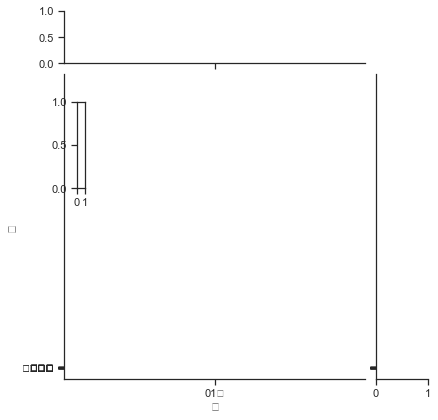

In [12]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
g = sns.JointGrid(data=seoul, x="월", y="구", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

In [ ]:
# 상표별+기간 ex) 기간별 상표에 따른 가격
seoul.pivot_table('휘발유',index=['상표','기간'],aggfunc='mean')

In [ ]:
# 지역+상표 가격 차이
seoul.pivot_table('휘발유',index=['지역','상표'],aggfunc='mean')

In [ ]:
# 상표별 가격 순위 (10)
#seoul.pivot_table('휘발유',index=['상표']).sort_values('휘발유', ascending=False).head(10)
#df.groupby(['Gender'])['Silver'].agg('sum')
#seoul.pivot_table('휘발유',index=['상표']).sort_values('휘발유', ascending=False).head(10)
seoul_1=pd.concat([seoul['상표'],seoul['휘발유'],seoul['지역']],axis=1).sort_values('휘발유', ascending=False).head(10)
seoul_1

In [ ]:
# 지역별 가격 낮은 순위 (10)
seoul_2=pd.concat([seoul['상표'],seoul['휘발유'],seoul['지역']],axis=1).sort_values('휘발유', ascending=True).head(10)
seoul_2